# Importing Libraries

In [1]:
# import libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import random
import os
pd.set_option('display.max_columns', None)
import math
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from selenium import webdriver 
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import time
from pandas import json_normalize
import requests
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
#importing .py files
import stats_function as stats
import API_function as api
import caracteristics_function as caracteristicas
import plotly.express as px

# Procesing Data

In [100]:
# Load data
pokemon = pd.read_csv('dataset\pokemon.csv')
pokemon_2= pd.read_csv('dataset\All_Pokemon.csv')

In [101]:
# Only taking 8 generation
pokemon_2 = pokemon_2[pokemon_2["Generation"] == 8]

# Delete not needed data and order the columns the same way as the other dataframe 
pokemon_2.drop(columns=["Mean","BMI","Mega Evolution","Alolan Form","Galarian Form","Standard Deviation","Experience type"],inplace= True)
pokemon_2.rename(columns={"Number":"pokedex_number","Att":"attack","Def":"defense","Spa":"sp_attack",
                          "Spd":"sp_defense","Spe":"speed","Experience to level 100":"experience_growth",
                          "Height":"height_m","Weight":"weight_kg","Catch Rate":"capture_rate","BST":"base_total",
                          "Type 1":"base_type","Type 2":"secondary_type","Against Fighting":"against_fight"}, inplace = True)

# Create emoy columns with the same name for the concat
pokemon_2["base_egg_steps"] = 0
pokemon_2["base_happiness"] = 0

# lowering columns
pokemon_2.columns = map(lambda x: str(x).lower(),pokemon_2.columns)

#Reeplacing blanks
pokemon_2.columns=map(lambda x: str(x).replace(" ","_"),pokemon_2.columns)

# Ordering columns
pokemon_2 = pokemon_2.loc[:,['pokedex_number','name','base_type', 'secondary_type','abilities', 'generation', 'legendary',
                         'attack', 'defense', 'hp', 'sp_attack', 'sp_defense', 'speed',
                         'against_bug', 'against_dark', 'against_dragon','against_electric',
                         'against_fairy', 'against_fight', 'against_fire','against_flying',
                         'against_ghost', 'against_grass', 'against_ground','against_ice', 
                         'against_normal', 'against_poison', 'against_psychic', 
                         'against_rock', 'against_steel', 'against_water', 
                         'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 
                          'experience_growth','height_m','weight_kg'
                        ]]

# Capitalize columns
pokemon_2.columns = map(lambda x: str(x).capitalize(),pokemon_2.columns)

pokemon_2["Generation"] = pokemon_2.Generation.astype(int)
pokemon_2["Legendary"] = pokemon_2.Legendary.astype(int)

In [102]:
# Dropping not needed columns
pokemon.drop(columns=["japanese_name","percentage_male","classfication"], inplace=True)
# Re ordering
pokemon = pokemon.loc[:,['pokedex_number','name','type1', 'type2','abilities', 'generation', 'is_legendary',
                         'attack', 'defense', 'hp', 'sp_attack', 'sp_defense', 'speed',
                         'against_bug', 'against_dark', 'against_dragon','against_electric',
                         'against_fairy', 'against_fight', 'against_fire','against_flying',
                         'against_ghost', 'against_grass', 'against_ground','against_ice', 
                         'against_normal', 'against_poison', 'against_psychic', 
                         'against_rock', 'against_steel', 'against_water', 
                         'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 
                          'experience_growth','height_m','weight_kg'
                        ]]

# Renaming some columns for more clarity
pokemon.rename(columns={"type1":"Base_type","type2":"Secondary_type","is_legendary":"Legendary"},inplace=True)

# Capitalize columns
pokemon.columns = map(lambda x: str(x).capitalize(),pokemon.columns)



In [103]:
# Concat of both Dataframes

pokemon = pd.concat([pokemon,pokemon_2])
pokemon.reset_index(drop=True)

,Pokedex_number,Name,Base_type,Secondary_type,Abilities,Generation,Legendary,Attack,Defense,Hp,Sp_attack,Sp_defense,Speed,Against_bug,Against_dark,Against_dragon,Against_electric,Against_fairy,Against_fight,Against_fire,Against_flying,Against_ghost,Against_grass,Against_ground,Against_ice,Against_normal,Against_poison,Against_psychic,Against_rock,Against_steel,Against_water,Base_egg_steps,Base_happiness,Base_total,Capture_rate,Experience_growth,Height_m,Weight_kg
0,1,Bulbasaur,grass,poison,"['Overgrow', 'Chlorophyll']",1,0,49,49,45,65,65,45,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,5120,70,318,45,1059860,0.7,6.9
1,2,Ivysaur,grass,poison,"['Overgrow', 'Chlorophyll']",1,0,62,63,60,80,80,60,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,5120,70,405,45,1059860,1.0,13.0
2,3,Venusaur,grass,poison,"['Overgrow', 'Chlorophyll']",1,0,100,123,80,122,120,80,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,5120,70,625,45,1059860,2.0,100.0
3,4,Charmander,fire,NaN,"['Blaze', 'Solar Power']",1,0,52,43,39,60,50,65,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,5120,70,309,45,1059860,0.6,8.5
4,5,Charmeleon,fire,NaN,"['Blaze', 'Solar Power']",1,0,64,58,58,80,65,80,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,5120,70,405,45,1059860,1.1,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,896,Glastrier,Ice,NaN,['Chilling Neigh'],8,1,145,130,100,65,110,30,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.00,1.0,0.5,1.0,1.0,1.0,2.0,2.0,1.0,0,0,580,3,1250000,2.2,800.0
912,897,Spectrier,Ghost,NaN,['Grim Neigh'],8,1,65,60,100,145,80,130,0.5,2.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,1.00,1.0,1.0,0.0,0.5,1.0,1.0,1.0,1.0,0,0,580,3,1250000,2.0,44.5
913,898,Calyrex,Psychic,Grass,['Unnerve'],8,1,80,80,100,80,80,80,4.0,2.0,1.0,0.5,1.0,0.5,2.0,2.0,2.0,0.50,0.5,2.0,1.0,2.0,0.5,1.0,1.0,0.5,0,0,500,3,1250000,1.1,7.7
914,898,Calyrex Ice Rider,Psychic,Ice,['As One'],8,1,165,150,100,85,130,50,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.00,1.0,0.5,1.0,1.0,0.5,2.0,2.0,1.0,0,0,680,3,1250000,2.4,809.1


In [116]:
#Calling function stats.py
p,name,bt,hp,defense,attack,spa,spd,speed = stats.stats()

0001
Bulbasaur
318
45
49
49
65
65
45
0002
Ivysaur
405
60
62
63
80
80
60
0003
Venusaur
525
80
82
83
100
100
80
0003
Venusaur
625
80
100
123
122
120
80
0004
Charmander
309
39
52
43
60
50
65
0005
Charmeleon
405
58
64
58
80
65
80
0006
Charizard
534
78
84
78
109
85
100
0006
Charizard
634
78
130
111
130
85
100
0006
Charizard
634
78
104
78
159
115
100
0007
Squirtle
314
44
48
65
50
64
43
0008
Wartortle
405
59
63
80
65
80
58
0009
Blastoise
530
79
83
100
85
105
78
0009
Blastoise
630
79
103
120
135
115
78
0010
Caterpie
195
45
30
35
20
20
45
0011
Metapod
205
50
20
55
25
25
30
0012
Butterfree
395
60
45
50
90
80
70
0013
Weedle
195
40
35
30
20
20
50
0014
Kakuna
205
45
25
50
25
25
35
0015
Beedrill
395
65
90
40
45
80
75
0015
Beedrill
495
65
150
40
15
80
145
0016
Pidgey
251
40
45
40
35
35
56
0017
Pidgeotto
349
63
60
55
50
50
71
0018
Pidgeot
479
83
80
75
70
70
101
0018
Pidgeot
579
83
80
80
135
80
121
0019
Rattata
253
30
56
35
25
35
72
0019
Rattata
253
30
56
35
25
35
72
0020
Raticate
413
55
81
60
50
70
97

In [117]:
# New DF with scraped data

new = {"Pokedex_number":p,"Name":name,"Base_total":bt,"Hp":hp,"Defense":defense,"Attack":attack,"Sp_attack":spa,"Sp_defense":spd,"Speed":speed}
scrap = pd.DataFrame(new)

#Modifying types
scrap["Pokedex_number"] = scrap["Pokedex_number"].astype(int)
scrap["Base_total"] = scrap["Base_total"].astype(int)
scrap["Hp"] = scrap["Hp"].astype(int)
scrap["Defense"] = scrap["Defense"].astype(int)
scrap["Attack"] = scrap["Attack"].astype(int)
scrap["Sp_attack"] = scrap["Sp_attack"].astype(int)
scrap["Sp_defense"] = scrap["Sp_defense"].astype(int)
scrap["Speed"] = scrap["Speed"].astype(int)

#Delete duplicates and keep first occurrency
scrap.drop_duplicates(subset='Name',keep='first',inplace=True)
scrap.tail()


,Pokedex_number,Name,Base_total,Hp,Defense,Attack,Sp_attack,Sp_defense,Speed
1208,1021,Raging Bolt,125,73,91,137,89,75,590
1209,1022,Iron Boulder,90,120,80,68,108,124,590
1210,1023,Iron Crown,90,72,100,122,108,98,590
1211,1024,Terapagos,90,65,85,65,85,60,450
1214,1025,Pecharunt,88,88,160,88,88,88,600


In [118]:
# Adding pokemons that are missing to the original DF
scrap = scrap.loc[1067:]
pokemon = pd.concat([pokemon,scrap])
pokemon.tail()

,Pokedex_number,Name,Base_type,Secondary_type,Abilities,Generation,Legendary,Attack,Defense,Hp,Sp_attack,Sp_defense,Speed,Against_bug,Against_dark,Against_dragon,Against_electric,Against_fairy,Against_fight,Against_fire,Against_flying,Against_ghost,Against_grass,Against_ground,Against_ice,Against_normal,Against_poison,Against_psychic,Against_rock,Against_steel,Against_water,Base_egg_steps,Base_happiness,Base_total,Capture_rate,Experience_growth,Height_m,Weight_kg
1208,1021,Raging Bolt,NaN,NaN,NaN,NaN,NaN,137,91,73,89,75,590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125,NaN,NaN,NaN,NaN
1209,1022,Iron Boulder,NaN,NaN,NaN,NaN,NaN,68,80,120,108,124,590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN
1210,1023,Iron Crown,NaN,NaN,NaN,NaN,NaN,122,100,72,108,98,590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN
1211,1024,Terapagos,NaN,NaN,NaN,NaN,NaN,65,85,65,85,60,450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN
1214,1025,Pecharunt,NaN,NaN,NaN,NaN,NaN,88,160,88,88,88,600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88,NaN,NaN,NaN,NaN


In [115]:
api_poke,poke_evol = api.evolutions()

Pokemon: bulbasaur
Pokemon: charmander
Pokemon: squirtle
Pokemon: caterpie
Pokemon: weedle
Pokemon: pidgey
Pokemon: rattata
Pokemon: spearow
Pokemon: ekans
Pokemon: pichu
Pokemon: sandshrew
Pokemon: nidoran-f
Pokemon: nidoran-m
Pokemon: cleffa
Pokemon: vulpix
Pokemon: igglybuff
Pokemon: zubat
Pokemon: oddish
Pokemon: paras
Pokemon: venonat
Pokemon: diglett
Pokemon: meowth
Pokemon: psyduck
Pokemon: mankey
Pokemon: growlithe
Pokemon: poliwag
Pokemon: abra
Pokemon: machop
Pokemon: bellsprout
Pokemon: tentacool
Pokemon: geodude
Pokemon: ponyta
Pokemon: slowpoke
Pokemon: magnemite
Pokemon: farfetchd
Pokemon: doduo
Pokemon: seel
Pokemon: grimer
Pokemon: shellder
Pokemon: gastly
Pokemon: onix
Pokemon: drowzee
Pokemon: krabby
Pokemon: voltorb
Pokemon: exeggcute
Pokemon: cubone
Pokemon: tyrogue
Pokemon: lickitung
Pokemon: koffing
Pokemon: rhyhorn
Pokemon: happiny
Pokemon: tangela
Pokemon: horsea
Pokemon: goldeen
Pokemon: staryu
Pokemon: mime-jr
Pokemon: scyther
Pokemon: smoochum
Pokemon: elekid

In [119]:
# List to DataFrame
evolutions = pd.DataFrame()
evolutions["Name"] = api_poke
evolutions["Evolution"] = poke_evol

# Capitalize names and evolutions so we will be able to merge

evolutions["Name"] = evolutions["Name"].apply(lambda x: str(x).capitalize())
evolutions["Evolution"] = evolutions["Evolution"].apply(lambda x: str(x).capitalize())

# Merge both Dataframes

pokemon = pokemon.merge(evolutions, left_on="Name", right_on="Name", how="left")

In [120]:
# Re indexa columns for more clarity

pokemon = pokemon.loc[:,['Pokedex_number', 'Name', 'Evolution', 'Base_type', 'Secondary_type',
       'Abilities', 'Generation', 'Legendary', 'Attack', 'Defense', 'Hp',
       'Sp_attack', 'Sp_defense', 'Speed', 'Height_m','Weight_kg', 'Against_bug', 'Against_dark',
       'Against_dragon', 'Against_electric', 'Against_fairy', 'Against_fight',
       'Against_fire', 'Against_flying', 'Against_ghost', 'Against_grass',
       'Against_ground', 'Against_ice', 'Against_normal', 'Against_poison',
       'Against_psychic', 'Against_rock', 'Against_steel', 'Against_water',
       'Base_egg_steps', 'Base_happiness', 'Base_total', 'Capture_rate',
       'Experience_growth'
        ]]

In [121]:
# Fillna in order to can filter null values and correct evolutions

pokemon["Evolution"].fillna("Unknown",inplace=True)

# Manual correction of missing evolutions through dictionaries

evol = {1:"Venusaur",
        4:"Charizard",
        7:"Blastoise",
        10:"Butterfree",
        13:"Beedrill",
        16:"Pidgeot",
        24:"Raichu",
        28:"Nidorina",
        29:"Nidoqueen",
        31:"Nidorino",
        32:"Nidoking",
        34:"Clefable",
        38:"Wigglytuff",
        41:"Crobat",
        43:"Vileplum",
        60:"Poliwrath",
        63:"Alakazam",
        66:"Machamp",
        69:"Victreebel",
        74:"Golem",
        92:"Gengar",
        116:"Kingdra",
        147:"Dragonite",
        153:"Meganium",
        155:"Typhlosion",
        158:"Feraligatr",
        182:"Azumarill",
        246:"Tyranitar",
        252:"Sceptile",
        256:"Blaziken",
        259:"Swampert",
        270:"Ludicolo",
        273:"Shiftry",
        280:"Gardevoir",
        287:"Slaking",
        290:"Shedinja",
        293:"Exploud",
        304:"Aggron",
        363:"Walrein",
        372:"Salamance",
        375:"Metagross",
        387:"Torterra",
        391:"Infernape",
        394:"Empoleon",
        396:"Staraptor",
        403:"Luxray",
        443:"Garchomp",
        495:"Serperior",
        498:"Emboar",
        501:"Samurott",
        507:"Stoutland",
        519:"Unfezant",
        525:"Gigalith",
        532:"Conkeldurr",
        535:"Seismitoad",
        540:"Leavanny",
        543:"Scolipede",
        551:"Krookodile",
        574:"Gothitelle",
        577:"Reuniclus",
        582:"Vanilluxe",
        599:"Klinklang",
        602:"Eelektross",
        607:"Chandelure",
        610:"Haxorus",
        650:"Chesnaught",
        653:"Delphox",
        656:"Greninja",
        661:"Talonflame",
        664:"Vivillion",
        668:"Floette",
        669:"Florges",
        679:"Aegislash",
        704:"Goodra",
        723:"Decidueye",
        726:"Incineroar",
        728:"Primarina",
        731:"Toucannon",
        736:"Vikavolt",
        761:"Tsareena",
        772:"Silvally",
        783:"Kommo-o",
        801:"Perrserker",
        802:"Galarian Rapidash",
        804: "Galarian Slowbro",
        806:"Galarian Sirfetch'd",
        807: "Galarian Koofing",
        808: "Galarian Mr.Rime",
        813: "Cursola",
        814: "Galarian Linoone",
        815: "Obstagoon",
        817: "Darmanitan",
        819: "Runerigus"


        }
pokemon["Evolution"].update(pd.Series(evol))

In [122]:
# Scraping 9 gen names and types

PATH=("C:\Program Files (x86)\chromedriver.exe")
driver=webdriver.Chrome(PATH)
driver.get("https://bulbapedia.bulbagarden.net/wiki/List_of_Pok%C3%A9mon_by_National_Pok%C3%A9dex_number#List_of_Pok%C3%A9mon_by_National_Pok%C3%A9dex_number")
time.sleep(5)
new_gen = []
tipo1 = []
tipo2 = []

# Looping to get names
for i in range(2,136):
    try:

        name = driver.find_element_by_xpath(f'//*[@id="mw-content-text"]/div[1]/table[10]/tbody/tr[{i}]/td[3]/a').text
        new_gen.append(name)
        print(name)
        # Try to save first type
        try:
            t = driver.find_element_by_xpath(f'//*[@id="mw-content-text"]/div[1]/table[10]/tbody/tr[{i}]/td[4]').text
            tipo1.append(t)
            print(tipo1)
        
        except:
            tipo1.append(None)

    # Try to get second type
        try:
            
            t2 = driver.find_element_by_xpath(f'//*[@id="mw-content-text"]/div[1]/table[10]/tbody/tr[{i}]/td[5]').text
            tipo2.append(t2)
            print(tipo2)
        
        except:
            tipo2.append(None)
    except:
        driver.close()
driver.close()
# Converting data scrapped to DataFrame 
p = {"Name":new_gen,"Type_1":tipo1,"Type_2":tipo2}
scraped = pd.DataFrame(p)
scraped.tail()


Sprigatito
['Grass']
Floragato
['Grass', 'Grass']
Meowscarada
['Grass', 'Grass', 'Grass']
[None, None, 'Dark']
Fuecoco
['Grass', 'Grass', 'Grass', 'Fire']
Crocalor
['Grass', 'Grass', 'Grass', 'Fire', 'Fire']
Skeledirge
['Grass', 'Grass', 'Grass', 'Fire', 'Fire', 'Fire']
[None, None, 'Dark', None, None, 'Ghost']
Quaxly
['Grass', 'Grass', 'Grass', 'Fire', 'Fire', 'Fire', 'Water']
Quaxwell
['Grass', 'Grass', 'Grass', 'Fire', 'Fire', 'Fire', 'Water', 'Water']
Quaquaval
['Grass', 'Grass', 'Grass', 'Fire', 'Fire', 'Fire', 'Water', 'Water', 'Water']
[None, None, 'Dark', None, None, 'Ghost', None, None, 'Fighting']
Lechonk
['Grass', 'Grass', 'Grass', 'Fire', 'Fire', 'Fire', 'Water', 'Water', 'Water', 'Normal']
Oinkologne
['Grass', 'Grass', 'Grass', 'Fire', 'Fire', 'Fire', 'Water', 'Water', 'Water', 'Normal', 'Normal']
Normal
Tarountula
['Grass', 'Grass', 'Grass', 'Fire', 'Fire', 'Fire', 'Water', 'Water', 'Water', 'Normal', 'Normal', None, 'Bug']
Spidops
['Grass', 'Grass', 'Grass', 'Fire', 'Fir

,Name,Type_1,Type_2
129,Iron Boulder,Rock,Psychic
130,Iron Crown,Steel,Psychic
131,Terapagos,Normal,None
132,Normal,None,None
133,Pecharunt,Poison,Ghost


In [123]:
#Merging data to be able to join types according to names
pokemon = pokemon.merge(scraped, left_on="Name", right_on="Name", how="left")
#Mapping base type and secondary type
gen9_type = scraped["Name"].to_list()
pokemon["Base_type"] = pokemon.apply(lambda x: x["Type_1"] if x["Name"] in gen9_type else x["Base_type"], axis=1)
pokemon["Secondary_type"] = pokemon.apply(lambda x: x["Type_2"] if x["Name"] in gen9_type else x["Secondary_type"], axis=1)

In [124]:
# Correcting NANs of base_type

basic = {916:'Psychic',
         917:'Normal',
         918:'Bug',
         919:'Ground',
         920:'Water',
         921:'Fighting',
         922:'Dark',
         923:'Fairy'} 

pokemon["Base_type"].update(pd.Series(basic))

second = {916:'Grass',
         917:'Psychic',
         918:'Rock',
         919:'Normal',
         920:'Ghost',
         921:'Poison',
         922:'Poison',
         923:'Flying'} 

pokemon["Secondary_type"].update(pd.Series(second))
# Fillna to clarify single type pokemon 
pokemon["Secondary_type"].fillna('-',inplace=True)

In [125]:
# Drop no needed columns 
pokemon.drop(columns=["Type_1","Type_2"], axis=1,inplace=True)

# All types capitalized
pokemon["Base_type"] = pokemon["Base_type"].apply(lambda x: str(x).capitalize())
pokemon["Secondary_type"] = pokemon["Secondary_type"].apply(lambda x: str(x).capitalize())

In [185]:
# Save dat to csv

pokemon.to_csv('dataset/pokemon_casi.csv')
pokemon_casi = pd.read_csv('dataset/pokemon_casi.csv')

In [186]:
pokemon_casi

,Unnamed: 0,Pokedex_number,Name,Evolution,Base_type,Secondary_type,Abilities,Generation,Legendary,Attack,Defense,Hp,Sp_attack,Sp_defense,Speed,Height_m,Weight_kg,Against_bug,Against_dark,Against_dragon,Against_electric,Against_fairy,Against_fight,Against_fire,Against_flying,Against_ghost,Against_grass,Against_ground,Against_ice,Against_normal,Against_poison,Against_psychic,Against_rock,Against_steel,Against_water,Base_egg_steps,Base_happiness,Base_total,Capture_rate,Experience_growth
0,0,1,Bulbasaur,Ivysaur,Grass,Poison,"['Overgrow', 'Chlorophyll']",1.0,0.0,49,49,45,65,65,45,0.7,6.9,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,5120.0,70.0,318,45,1059860.0
1,1,2,Ivysaur,Venusaur,Grass,Poison,"['Overgrow', 'Chlorophyll']",1.0,0.0,62,63,60,80,80,60,1.0,13.0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,5120.0,70.0,405,45,1059860.0
2,2,3,Venusaur,Unknown,Grass,Poison,"['Overgrow', 'Chlorophyll']",1.0,0.0,100,123,80,122,120,80,2.0,100.0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,5120.0,70.0,625,45,1059860.0
3,3,4,Charmander,Charmeleon,Fire,-,"['Blaze', 'Solar Power']",1.0,0.0,52,43,39,60,50,65,0.6,8.5,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,5120.0,70.0,309,45,1059860.0
4,4,5,Charmeleon,Charizard,Fire,-,"['Blaze', 'Solar Power']",1.0,0.0,64,58,58,80,65,80,1.1,19.0,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,5120.0,70.0,405,45,1059860.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,1167,1021,Raging Bolt,Unknown,Electric,Dragon,NaN,NaN,NaN,137,91,73,89,75,590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125,NaN,NaN
1168,1168,1022,Iron Boulder,Unknown,Rock,Psychic,NaN,NaN,NaN,68,80,120,108,124,590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,NaN,NaN
1169,1169,1023,Iron Crown,Unknown,Steel,Psychic,NaN,NaN,NaN,122,100,72,108,98,590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,NaN,NaN
1170,1170,1024,Terapagos,No hay,Normal,-,NaN,NaN,NaN,65,85,65,85,60,450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,NaN,NaN


In [173]:
# Calling caracteristicas function.py
numero,nombre,abilities,altura,peso,egg_step,capture = caracteristicas.caracteristicas()

Calyrex
1070
Unnerve
Unnerve
Unnerve
1.1 m (3′07″)
7.7 kg (17.0 lbs)
(30,584–30,840 steps)
3 (0.4% with PokéBall, full HP)
Wyrdeer
1071
Intimidate
Frisk
Sap Sipper
1.8 m (5′11″)
95.1 kg (209.7 lbs)
(4,884–5,140 steps)
45 (5.9% with PokéBall, full HP)
Kleavor
1072
Swarm
Sheer Force
Sharpness
1.8 m (5′11″)
89.0 kg (196.2 lbs)
(4,884–5,140 steps)
15 (2.0% with PokéBall, full HP)
Ursaluna
1073
Guts
Bulletproof
Unnerve
2.4 m (7′10″)
290.0 kg (639.3 lbs)
(4,884–5,140 steps)
20 (2.6% with PokéBall, full HP)
Ursaluna
1074
Guts
Bulletproof
Unnerve
2.4 m (7′10″)
290.0 kg (639.3 lbs)
(4,884–5,140 steps)
20 (2.6% with PokéBall, full HP)
Basculegion
1075
Swift Swim
Adaptability
Mold Breaker
3.0 m (9′10″)
110.0 kg (242.5 lbs)
(4,884–5,140 steps)
45 (5.9% with PokéBall, full HP)
Basculegion
1076
Swift Swim
Adaptability
Mold Breaker
3.0 m (9′10″)
110.0 kg (242.5 lbs)
(4,884–5,140 steps)
45 (5.9% with PokéBall, full HP)
Sneasler
1077
Pressure
Unburden
Poison Touch
1.3 m (4′03″)
43.0 kg (94.8 lbs)
(4,88

In [174]:
# Converting the list into a list of lists so we mantain the same format as the original DF
conteo = -1
listed_ab =[]
for i in abilities:
    if type(i) != int:
        listed_ab[conteo].append(i)
    else:
        listed_ab.append([])
        conteo +=1
        
# Check lens
print(len(nombre))
print(len(listed_ab))
print(len(altura))
print(len(capture))
print(len(egg_step))
print(len(peso))

146
146
146
146
124
146


In [175]:
# Transforming data to mantain format and only keep wanted data
altura = [i.split(' ')[0] for i in altura] 
peso = [i.split(' ')[0] for i in peso]
capture = [int(i.split(' ')[0]) for i in capture]  
egg_step = [i[1:6] for i in egg_step]

In [176]:
# Replace coma per point
egg_step_2= [i.replace(',','.') for i in egg_step]

egg_step_2

['30.58',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '3.599',
 '3.599',
 '3.599',
 '3.599',
 '3.599',
 '4.884',
 '4.884',
 '3.599',
 '3.599',
 '3.599',
 '2.314',
 '2.314',
 '2.314',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '3.599',
 '3.599',
 '3.599',
 '3.599',
 '4.884',
 '4.884',
 '4.884',
 '8.739',
 '8.739',
 '8.739',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '8.739',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '8.739',
 '10.02',
 '10.02',
 '10.02',
 '4.884',
 '4.884',
 '7.454',
 '8.739',
 '7.454',
 '7.454',
 '4.884',
 '4.884',
 '4.884',
 '6.169',
 '6.169',
 '4.884',
 '10.02',
 '8.739',
 '8.739',
 '8.739',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '4.884',
 '12.59',
 '12.59',


In [177]:
# Filling to obtain the same len
for i in range(22):
    egg_step_2.append(None)
len(egg_step_2)

146

In [187]:
# New DF with scraped characteristics
sc = {"Pokedex":numero,"Name":nombre,"Ability":listed_ab,"Height":altura,"Weight":peso,"Base_egg_step":egg_step_2,"Capture":capture}
df = pd.DataFrame(sc)
df.head()

# Save data in csv
df.to_csv('dataset/9_gen_df.csv')
gen_df = pd.read_csv('dataset/9_gen_df.csv')

In [189]:
# Delete unwanted columns
gen_df.drop(columns='Unnamed: 0',inplace=True)

# Change types
gen_df["Weight"] = gen_df["Weight"].astype(float)
gen_df["Base_egg_step"] = gen_df["Base_egg_step"].astype(float)
gen_df["Height"] = gen_df["Height"].astype(int)
gen_df["Capture"] = gen_df["Capture"].astype(int)

In [190]:
# Fixing strange value of capture rate
d ={773:30,
    1060:3}

pokemon_casi["Capture_rate"].update(pd.Series(d))

In [191]:
# Merging per name in order to add the rest of the features
pokemon_casi = pokemon_casi.merge(gen_df, left_on='Name', right_on='Name',how='left')

#Add/Mapping the features of the pokemons we brought from the merging
gen9_stats = gen_df["Name"].to_list()
pokemon_casi["Abilities"] = pokemon_casi.apply(lambda x: x["Ability"] if x["Name"] in gen9_stats else x["Abilities"], axis=1)
pokemon_casi["Height_m"] = pokemon_casi.apply(lambda x: x["Height"] if x["Name"] in gen9_stats else x["Height_m"], axis=1)
pokemon_casi["Weight_kg"] = pokemon_casi.apply(lambda x: x["Weight"] if x["Name"] in gen9_stats else x["Weight_kg"], axis=1)
pokemon_casi["Base_egg_steps"] = pokemon_casi.apply(lambda x: x["Base_egg_step"] if x["Name"] in gen9_stats else x["Base_egg_steps"], axis=1)
pokemon_casi["Capture_rate"] = pokemon_casi.apply(lambda x: int(x["Capture"]) if x["Name"] in gen9_stats else int(x["Capture_rate"]), axis=1)

pokemon_casi.tail()

,Unnamed: 0,Pokedex_number,Name,Evolution,Base_type,Secondary_type,Abilities,Generation,Legendary,Attack,Defense,Hp,Sp_attack,Sp_defense,Speed,Height_m,Weight_kg,Against_bug,Against_dark,Against_dragon,Against_electric,Against_fairy,Against_fight,Against_fire,Against_flying,Against_ghost,Against_grass,Against_ground,Against_ice,Against_normal,Against_poison,Against_psychic,Against_rock,Against_steel,Against_water,Base_egg_steps,Base_happiness,Base_total,Capture_rate,Experience_growth,Pokedex,Ability,Height,Weight,Base_egg_step,Capture
1203,1169,1023,Iron Crown,Unknown,Steel,Psychic,"['Quark Drive', 'Quark Drive', 'Quark Drive']",NaN,NaN,122,100,72,108,98,590,1.0,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,10,NaN,1211.0,"['Quark Drive', 'Quark Drive', 'Quark Drive']",1.0,156.0,NaN,10.0
1204,1170,1024,Terapagos,No hay,Normal,-,"['Tera Shift', 'Tera Shift', 'Tera Shift']",NaN,NaN,65,85,65,85,60,450,0.0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,255,NaN,1212.0,"['Tera Shift', 'Tera Shift', 'Tera Shift']",0.0,6.5,NaN,255.0
1205,1170,1024,Terapagos,No hay,Normal,-,"['Tera Shift', 'Tera Shift', 'Tera Shift']",NaN,NaN,65,85,65,85,60,450,0.0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,255,NaN,1213.0,"['Tera Shift', 'Tera Shift', 'Tera Shift']",0.0,6.5,NaN,255.0
1206,1170,1024,Terapagos,No hay,Normal,-,"['Tera Shift', 'Tera Shift', 'Tera Shift']",NaN,NaN,65,85,65,85,60,450,0.0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,255,NaN,1214.0,"['Tera Shift', 'Tera Shift', 'Tera Shift']",0.0,6.5,NaN,255.0
1207,1171,1025,Pecharunt,No hay,Poison,Ghost,"['Poison Puppeteer', 'Poison Puppeteer', 'Pois...",NaN,NaN,88,160,88,88,88,600,0.0,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88,3,NaN,1215.0,"['Poison Puppeteer', 'Poison Puppeteer', 'Pois...",0.0,0.3,NaN,3.0


In [192]:
# Drop extra columns from the merge

pokemon_casi.drop(columns=["Unnamed: 0","Pokedex","Ability","Height","Weight","Base_egg_step","Capture"],inplace=True)
pokemon_casi.tail()

,Pokedex_number,Name,Evolution,Base_type,Secondary_type,Abilities,Generation,Legendary,Attack,Defense,Hp,Sp_attack,Sp_defense,Speed,Height_m,Weight_kg,Against_bug,Against_dark,Against_dragon,Against_electric,Against_fairy,Against_fight,Against_fire,Against_flying,Against_ghost,Against_grass,Against_ground,Against_ice,Against_normal,Against_poison,Against_psychic,Against_rock,Against_steel,Against_water,Base_egg_steps,Base_happiness,Base_total,Capture_rate,Experience_growth
1203,1023,Iron Crown,Unknown,Steel,Psychic,"['Quark Drive', 'Quark Drive', 'Quark Drive']",NaN,NaN,122,100,72,108,98,590,1.0,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,10,NaN
1204,1024,Terapagos,No hay,Normal,-,"['Tera Shift', 'Tera Shift', 'Tera Shift']",NaN,NaN,65,85,65,85,60,450,0.0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,255,NaN
1205,1024,Terapagos,No hay,Normal,-,"['Tera Shift', 'Tera Shift', 'Tera Shift']",NaN,NaN,65,85,65,85,60,450,0.0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,255,NaN
1206,1024,Terapagos,No hay,Normal,-,"['Tera Shift', 'Tera Shift', 'Tera Shift']",NaN,NaN,65,85,65,85,60,450,0.0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,255,NaN
1207,1025,Pecharunt,No hay,Poison,Ghost,"['Poison Puppeteer', 'Poison Puppeteer', 'Pois...",NaN,NaN,88,160,88,88,88,600,0.0,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88,3,NaN


In [193]:
# Filling Null values of generation
pokemon_casi["Generation"].fillna(9.0,inplace=True)

In [194]:
# Checking duplicates
pokemon_casi[pokemon_casi.duplicated(keep=False)]

,Pokedex_number,Name,Evolution,Base_type,Secondary_type,Abilities,Generation,Legendary,Attack,Defense,Hp,Sp_attack,Sp_defense,Speed,Height_m,Weight_kg,Against_bug,Against_dark,Against_dragon,Against_electric,Against_fairy,Against_fight,Against_fire,Against_flying,Against_ghost,Against_grass,Against_ground,Against_ice,Against_normal,Against_poison,Against_psychic,Against_rock,Against_steel,Against_water,Base_egg_steps,Base_happiness,Base_total,Capture_rate,Experience_growth
919,901,Ursaluna,Unknown,Ground,Normal,"['Guts', 'Bulletproof', 'Unnerve']",9.0,NaN,45,105,140,80,50,550,2.0,290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.884,NaN,130,20,NaN
920,901,Ursaluna,Unknown,Ground,Normal,"['Guts', 'Bulletproof', 'Unnerve']",9.0,NaN,45,105,140,80,50,550,2.0,290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.884,NaN,130,20,NaN
921,902,Basculegion,Unknown,Water,Ghost,"['Swift Swim', 'Adaptability', 'Mold Breaker']",9.0,NaN,80,65,112,75,78,530,3.0,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.884,NaN,120,45,NaN
922,902,Basculegion,Unknown,Water,Ghost,"['Swift Swim', 'Adaptability', 'Mold Breaker']",9.0,NaN,80,65,112,75,78,530,3.0,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.884,NaN,120,45,NaN
925,905,Enamorus,No hay,Fairy,Flying,"['Cute Charm', 'Cute Charm', 'Contrary']",9.0,NaN,135,70,115,80,106,580,1.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.884,NaN,74,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,1023,Iron Crown,Unknown,Steel,Psychic,"['Quark Drive', 'Quark Drive', 'Quark Drive']",9.0,NaN,122,100,72,108,98,590,1.0,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,10,NaN
1204,1024,Terapagos,No hay,Normal,-,"['Tera Shift', 'Tera Shift', 'Tera Shift']",9.0,NaN,65,85,65,85,60,450,0.0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,255,NaN
1205,1024,Terapagos,No hay,Normal,-,"['Tera Shift', 'Tera Shift', 'Tera Shift']",9.0,NaN,65,85,65,85,60,450,0.0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,255,NaN
1206,1024,Terapagos,No hay,Normal,-,"['Tera Shift', 'Tera Shift', 'Tera Shift']",9.0,NaN,65,85,65,85,60,450,0.0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,255,NaN


In [195]:
# Manual correction of missing legendaries through dictionaries

legend = {488:1,
          792:0,
          793:0,
          794:0,
          795:0,
          796:0,
          797:0,
          798:0,
          771:1,
          772:1,
          919:1,
          925:1,
          926:1,
          1032:1,
          1033:1,
          1034:1,
          1035:1,
          1038:1,
          1039:1,
          1045:1,
          1046:1,
          1047:1,
          1048:1,
          1049:1,
          1050:1,
          1051:1,
          1058:1,
          1059:1,
          1060:1}
pokemon_casi["Legendary"].update(pd.Series(legend))
pokemon_casi["Legendary"].fillna(0.0,inplace=True)

# Replacing with final values for Evolutions

pokemon_casi["Evolution"].replace({"Unknown":"Final Form",
                              "No hay":"Final Form"}, inplace=True)

# Filling null values with mean in Wheight and Height 
pokemon_casi["Height_m"] = pokemon_casi["Height_m"].fillna(pokemon_casi["Height_m"].mean())
pokemon_casi["Weight_kg"] = pokemon_casi["Weight_kg"].fillna(pokemon_casi["Weight_kg"].mean())

# Manual correction of some inconsisten names

names = {920:'Ursalana - Bloodmoon',
         921:'Basculegion - Male',
         922:'Basculegion - Female',
         925:'Enamorus - Incarnate Form',
         926:'Enamorus - Therian Form',
         937: 'Oinkologne - Male',
         938:'Oinkologne - Female',
         947:'Maushold - Family of Four',
         948:'Maushold - Family of Three',
         954:'Squawkabilly - Green Plumage',
         955:'Squawkabilly - Blue Plumage',
         956:'Squawkabilly - Yellow Plumage',
         957:'Squawkabilly - White Plumage',
         990:'Palafin - Zero Form',
         991:'Palafin - Hero Form',
         1005:'Tatsugiri - Curly Form',
         1006:'Tatsugiri - Droopy Form',
         1007:'Tatsugiri - Stretchy',
         1011:'Dudunsparce - Two-Segment Form',
         1012:'Dudunsparce - Three-Segment Form',
         1029:'Gimmighoul - Chest Form',
         1030:'Gimmighoul - Roaming Form',
         1048:'Ogerpon - Teal Mask',
         1049:'Ogerpon - Wellspring Mask',
         1050:'Ogerpon - Hearthflame Mask',
         1051:'Ogerpon - Cornerstone Mask',
         1058:'Terapagos - Normal Form',
         1059:'Terapagos - Terastal Form',
         1060:'Terapagos - Stellar Form'
         }

pokemon_casi["Name"].update(pd.Series(names))

In [196]:
# Drop 1 duplicate

pokemon_casi.drop(index=916,inplace=True)

In [197]:
# Fixing types of pokemons with the same name and diferent secondary type

special_second = {1049:'Water',
           1050:'Fire',
           1051:'Rock',
            }
pokemon_casi["Secondary_type"].update(pd.Series(special_second))

In [198]:
# Join of types in one column

pokemon_casi["Combination"] = pokemon_casi["Base_type"] + ', ' + pokemon_casi["Secondary_type"]
len(set(pokemon_casi["Combination"]))

218

In [199]:
# No NAN DF and NAN DF
pokemon_only_na = pokemon_casi[pokemon_casi["Against_bug"].isna()]
pokemon_no_na = pokemon_casi[~pokemon_casi["Against_bug"].isna()]


In [200]:
# Unique combination types of all pokemons
all_types = set(pokemon_no_na["Combination"])
# Create an empty dictionary to add the against avarages
defense_mapping = {}

# Looping in the set
for comb in all_types:
    # Split for types
    base, secondary = comb.split(', ')
    # Mean for each against type in the DF
    against_bug_mean = pokemon_no_na[(pokemon_no_na["Base_type"] == base) & (pokemon_no_na["Secondary_type"] == secondary)]["Against_bug"].mean()
    against_dark_mean = pokemon_no_na[(pokemon_no_na["Base_type"] == base) & (pokemon_no_na["Secondary_type"] == secondary)]["Against_dark"].mean()
    against_fire_mean = pokemon_no_na[(pokemon_no_na["Base_type"] == base) & (pokemon_no_na["Secondary_type"] == secondary)]["Against_fire"].mean()
    against_electric_mean = pokemon_no_na[(pokemon_no_na["Base_type"] == base) & (pokemon_no_na["Secondary_type"] == secondary)]["Against_electric"].mean()
    against_dragon_mean = pokemon_no_na[(pokemon_no_na["Base_type"] == base) & (pokemon_no_na["Secondary_type"] == secondary)]["Against_dragon"].mean()
    against_fairy_mean = pokemon_no_na[(pokemon_no_na["Base_type"] == base) & (pokemon_no_na["Secondary_type"] == secondary)]["Against_fairy"].mean()
    against_fight_mean = pokemon_no_na[(pokemon_no_na["Base_type"] == base) & (pokemon_no_na["Secondary_type"] == secondary)]["Against_fight"].mean()
    against_fly_mean = pokemon_no_na[(pokemon_no_na["Base_type"] == base) & (pokemon_no_na["Secondary_type"] == secondary)]["Against_flying"].mean()
    against_ghost_mean = pokemon_no_na[(pokemon_no_na["Base_type"] == base) & (pokemon_no_na["Secondary_type"] == secondary)]["Against_ghost"].mean()
    against_grass_mean = pokemon_no_na[(pokemon_no_na["Base_type"] == base) & (pokemon_no_na["Secondary_type"] == secondary)]["Against_grass"].mean()
    against_ground_mean = pokemon_no_na[(pokemon_no_na["Base_type"] == base) & (pokemon_no_na["Secondary_type"] == secondary)]["Against_ground"].mean()
    against_ice_mean = pokemon_no_na[(pokemon_no_na["Base_type"] == base) & (pokemon_no_na["Secondary_type"] == secondary)]["Against_ice"].mean()
    against_normal_mean = pokemon_no_na[(pokemon_no_na["Base_type"] == base) & (pokemon_no_na["Secondary_type"] == secondary)]["Against_normal"].mean()
    against_poison_mean = pokemon_no_na[(pokemon_no_na["Base_type"] == base) & (pokemon_no_na["Secondary_type"] == secondary)]["Against_poison"].mean()
    against_psy_mean = pokemon_no_na[(pokemon_no_na["Base_type"] == base) & (pokemon_no_na["Secondary_type"] == secondary)]["Against_psychic"].mean()
    against_rock_mean = pokemon_no_na[(pokemon_no_na["Base_type"] == base) & (pokemon_no_na["Secondary_type"] == secondary)]["Against_rock"].mean()
    against_steel_mean = pokemon_no_na[(pokemon_no_na["Base_type"] == base) & (pokemon_no_na["Secondary_type"] == secondary)]["Against_steel"].mean()
    against_water_mean = pokemon_no_na[(pokemon_no_na["Base_type"] == base) & (pokemon_no_na["Secondary_type"] == secondary)]["Against_water"].mean()

    # Append it to the dictionary
    defense_mapping[comb] = {}
    defense_mapping[comb]["bug"] = against_bug_mean
    defense_mapping[comb]["dark"] = against_dark_mean
    defense_mapping[comb]["fire"] = against_fire_mean
    defense_mapping[comb]["electric"] = against_electric_mean
    defense_mapping[comb]["dragon"] = against_dragon_mean
    defense_mapping[comb]["fairy"] = against_fairy_mean
    defense_mapping[comb]["fight"] = against_fight_mean
    defense_mapping[comb]["flying"] = against_fly_mean
    defense_mapping[comb]["ghost"] = against_ghost_mean
    defense_mapping[comb]["grass"] = against_grass_mean
    defense_mapping[comb]["ground"] = against_ground_mean
    defense_mapping[comb]["ice"] = against_ice_mean
    defense_mapping[comb]["normal"] = against_normal_mean
    defense_mapping[comb]["poison"] = against_poison_mean
    defense_mapping[comb]["psychic"] = against_psy_mean
    defense_mapping[comb]["rock"] = against_rock_mean
    defense_mapping[comb]["steel"] = against_steel_mean
    defense_mapping[comb]["water"] = against_water_mean
    
print(defense_mapping)



{'Rock, Steel': {'bug': 0.5, 'dark': 1.0, 'fire': 1.0, 'electric': 1.0, 'dragon': 0.5, 'fairy': 0.5, 'fight': 4.0, 'flying': 0.25, 'ghost': 1.0, 'grass': 1.0, 'ground': 4.0, 'ice': 0.5, 'normal': 0.25, 'poison': 0.0, 'psychic': 0.5, 'rock': 0.5, 'steel': 1.0, 'water': 2.0}, 'Bug, Poison': {'bug': 0.5, 'dark': 1.0, 'fire': 2.0, 'electric': 1.0, 'dragon': 1.0, 'fairy': 0.5, 'fight': 0.25, 'flying': 2.0, 'ghost': 1.0, 'grass': 0.25, 'ground': 1.0, 'ice': 1.0, 'normal': 1.0, 'poison': 0.5, 'psychic': 2.0, 'rock': 2.0, 'steel': 1.0, 'water': 1.0}, 'Ice, Flying': {'bug': 0.5, 'dark': 1.0, 'fire': 2.0, 'electric': 2.0, 'dragon': 1.0, 'fairy': 1.0, 'fight': 1.0, 'flying': 1.0, 'ghost': 1.0, 'grass': 0.5, 'ground': 0.0, 'ice': 1.0, 'normal': 1.0, 'poison': 1.0, 'psychic': 1.0, 'rock': 4.0, 'steel': 2.0, 'water': 1.0}, 'Electric, Ghost': {'bug': 0.5, 'dark': 2.0, 'fire': 1.0, 'electric': 0.5, 'dragon': 1.0, 'fairy': 1.0, 'fight': 0.0, 'flying': 0.5, 'ghost': 2.0, 'grass': 1.0, 'ground': 2.0, 'ic

In [201]:
# NAN df to map
vs = []
for i in pokemon_only_na.columns:
    if "Against" in i:
        vs.append(i)

# List with type names
my_mapping_list = ['bug','dark','fire','electric','dragon','fairy','fight','flying','ghost','grass','ground','ice','normal','poison','psychic','rock','steel','water']

# Iterate to do the mapping
for i,z in zip(pokemon_only_na[vs].columns,my_mapping_list):
    
    pokemon_only_na[i] = pokemon_only_na["Combination"].apply(lambda x: defense_mapping[x][z] if x in all_types else None )
  
pokemon_only_na.head()

,Pokedex_number,Name,Evolution,Base_type,Secondary_type,Abilities,Generation,Legendary,Attack,Defense,Hp,Sp_attack,Sp_defense,Speed,Height_m,Weight_kg,Against_bug,Against_dark,Against_dragon,Against_electric,Against_fairy,Against_fight,Against_fire,Against_flying,Against_ghost,Against_grass,Against_ground,Against_ice,Against_normal,Against_poison,Against_psychic,Against_rock,Against_steel,Against_water,Base_egg_steps,Base_happiness,Base_total,Capture_rate,Experience_growth,Combination
917,899,Wyrdeer,Final Form,Normal,Psychic,"['Intimidate', 'Frisk', 'Sap Sipper']",9.0,0.0,105,72,105,75,65,525,1.0,95.1,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,4.884,NaN,103,45,NaN,"Normal, Psychic"
918,900,Kleavor,Final Form,Bug,Rock,"['Swarm', 'Sheer Force', 'Sharpness']",9.0,0.0,45,95,135,70,85,500,1.0,89.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.5,1.0,2.0,2.0,2.0,4.884,NaN,70,15,NaN,"Bug, Rock"
919,901,Ursaluna,Final Form,Ground,Normal,"['Guts', 'Bulletproof', 'Unnerve']",9.0,1.0,45,105,140,80,50,550,2.0,290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.884,NaN,130,20,NaN,"Ground, Normal"
920,901,Ursalana - Bloodmoon,Final Form,Ground,Normal,"['Guts', 'Bulletproof', 'Unnerve']",9.0,0.0,45,105,140,80,50,550,2.0,290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.884,NaN,130,20,NaN,"Ground, Normal"
921,902,Basculegion - Male,Final Form,Water,Ghost,"['Swift Swim', 'Adaptability', 'Mold Breaker']",9.0,0.0,80,65,112,75,78,530,3.0,110.0,0.5,2.0,0.5,2.0,1.0,1.0,0.0,1.0,2.0,2.0,1.0,0.5,0.0,0.5,1.0,1.0,0.5,0.5,4.884,NaN,120,45,NaN,"Water, Ghost"


In [202]:
# To check against the df
defense_mapping['Water, Ghost']['bug']

0.5

In [203]:
# Concat of both df to obtain the final df
pokemon_final = pd.concat([pokemon_no_na,pokemon_only_na])
pokemon_final

,Pokedex_number,Name,Evolution,Base_type,Secondary_type,Abilities,Generation,Legendary,Attack,Defense,Hp,Sp_attack,Sp_defense,Speed,Height_m,Weight_kg,Against_bug,Against_dark,Against_dragon,Against_electric,Against_fairy,Against_fight,Against_fire,Against_flying,Against_ghost,Against_grass,Against_ground,Against_ice,Against_normal,Against_poison,Against_psychic,Against_rock,Against_steel,Against_water,Base_egg_steps,Base_happiness,Base_total,Capture_rate,Experience_growth,Combination
0,1,Bulbasaur,Ivysaur,Grass,Poison,"['Overgrow', 'Chlorophyll']",1.0,0.0,49,49,45,65,65,45,0.7,6.9,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.00,1.0,1.0,0.5,5120.0,70.0,318,45,1059860.0,"Grass, Poison"
1,2,Ivysaur,Venusaur,Grass,Poison,"['Overgrow', 'Chlorophyll']",1.0,0.0,62,63,60,80,80,60,1.0,13.0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.00,1.0,1.0,0.5,5120.0,70.0,405,45,1059860.0,"Grass, Poison"
2,3,Venusaur,Final Form,Grass,Poison,"['Overgrow', 'Chlorophyll']",1.0,0.0,100,123,80,122,120,80,2.0,100.0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.00,1.0,1.0,0.5,5120.0,70.0,625,45,1059860.0,"Grass, Poison"
3,4,Charmander,Charmeleon,Fire,-,"['Blaze', 'Solar Power']",1.0,0.0,52,43,39,60,50,65,0.6,8.5,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.00,2.0,0.5,2.0,5120.0,70.0,309,45,1059860.0,"Fire, -"
4,5,Charmeleon,Charizard,Fire,-,"['Blaze', 'Solar Power']",1.0,0.0,64,58,58,80,65,80,1.1,19.0,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.00,2.0,0.5,2.0,5120.0,70.0,405,45,1059860.0,"Fire, -"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,1023,Iron Crown,Final Form,Steel,Psychic,"['Quark Drive', 'Quark Drive', 'Quark Drive']",9.0,0.0,122,100,72,108,98,590,1.0,156.0,1.0,2.0,2.0,1.0,0.5,0.5,1.0,0.5,2.0,0.50,2.0,0.5,0.5,0.0,0.25,0.5,0.5,1.0,NaN,NaN,90,10,NaN,"Steel, Psychic"
1204,1024,Terapagos,Final Form,Normal,-,"['Tera Shift', 'Tera Shift', 'Tera Shift']",9.0,0.0,65,85,65,85,60,450,0.0,6.5,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.00,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,NaN,NaN,90,255,NaN,"Normal, -"
1205,1024,Terapagos,Final Form,Normal,-,"['Tera Shift', 'Tera Shift', 'Tera Shift']",9.0,0.0,65,85,65,85,60,450,0.0,6.5,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.00,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,NaN,NaN,90,255,NaN,"Normal, -"
1206,1024,Terapagos,Final Form,Normal,-,"['Tera Shift', 'Tera Shift', 'Tera Shift']",9.0,0.0,65,85,65,85,60,450,0.0,6.5,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.00,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,NaN,NaN,90,255,NaN,"Normal, -"


In [204]:
# Fill with 0 egg steps this pokemons because they can't have eggs, fill with the average for the rest
pokemon_final[(pokemon_final["Legendary"] == 1)&(pokemon_final["Base_egg_steps"].isna())]
legend_egg = {1045:0.0,
              1046:0.0,
              1047:0.0,
              1048:0.0,
              1049:0.0,
              1050:0.0,
              1051:0.0,
              1058:0.0,
              1059:0.0,
              1060:0.0
              }
pokemon_final["Base_egg_steps"].update(pd.Series(legend_egg))
pokemon_final["Base_egg_steps"].fillna(pokemon_final["Base_egg_steps"].mean(),inplace=True)

# Fillna of the average for experience growth and base happiness

pokemon_final["Experience_growth"].fillna(pokemon_final["Experience_growth"].mean(), inplace=True)
pokemon_final["Base_happiness"].fillna(pokemon_final["Base_happiness"].mean(), inplace=True)

In [205]:
# Fillna with the mean of against of the missing 40 pokemons(we do it like this because they are only 40 pokemons, small part of the sample)
pokemon_final["Against_dark"].isna().sum()

pokemon_final["Against_bug"].fillna(float(math.floor(pokemon_final["Against_bug"].mean())), inplace=True)
pokemon_final["Against_dark"].fillna(float(math.floor(pokemon_final["Against_dark"].mean())), inplace=True)
pokemon_final["Against_dragon"].fillna(float(math.floor(pokemon_final["Against_dragon"].mean())), inplace=True)
pokemon_final["Against_electric"].fillna(float(math.floor(pokemon_final["Against_electric"].mean())), inplace=True)
pokemon_final["Against_fairy"].fillna(float(math.floor(pokemon_final["Against_fairy"].mean())), inplace=True)
pokemon_final["Against_fight"].fillna(float(math.floor(pokemon_final["Against_fight"].mean())), inplace=True)
pokemon_final["Against_fire"].fillna(float(math.floor(pokemon_final["Against_fire"].mean())), inplace=True)
pokemon_final["Against_flying"].fillna(float(math.floor(pokemon_final["Against_flying"].mean())), inplace=True)
pokemon_final["Against_ghost"].fillna(float(math.floor(pokemon_final["Against_ghost"].mean())), inplace=True)
pokemon_final["Against_grass"].fillna(float(math.floor(pokemon_final["Against_grass"].mean())), inplace=True)
pokemon_final["Against_ground"].fillna(float(math.floor(pokemon_final["Against_ground"].mean())), inplace=True)
pokemon_final["Against_ice"].fillna(float(math.floor(pokemon_final["Against_ice"].mean())), inplace=True)
pokemon_final["Against_normal"].fillna(float(math.floor(pokemon_final["Against_normal"].mean())), inplace=True)
pokemon_final["Against_poison"].fillna(float(math.floor(pokemon_final["Against_poison"].mean())), inplace=True)
pokemon_final["Against_psychic"].fillna(float(math.floor(pokemon_final["Against_psychic"].mean())), inplace=True)
pokemon_final["Against_rock"].fillna(float(math.floor(pokemon_final["Against_rock"].mean())), inplace=True)
pokemon_final["Against_steel"].fillna(float(math.floor(pokemon_final["Against_steel"].mean())), inplace=True)
pokemon_final["Against_water"].fillna(float(math.floor(pokemon_final["Against_water"].mean())), inplace=True)

In [206]:
#Check nulls
pokemon_final.isna().sum()

Pokedex_number       0
Name                 0
Evolution            0
Base_type            0
Secondary_type       0
Abilities            0
Generation           0
Legendary            0
Attack               0
Defense              0
Hp                   0
Sp_attack            0
Sp_defense           0
Speed                0
Height_m             0
Weight_kg            0
Against_bug          0
Against_dark         0
Against_dragon       0
Against_electric     0
Against_fairy        0
Against_fight        0
Against_fire         0
Against_flying       0
Against_ghost        0
Against_grass        0
Against_ground       0
Against_ice          0
Against_normal       0
Against_poison       0
Against_psychic      0
Against_rock         0
Against_steel        0
Against_water        0
Base_egg_steps       0
Base_happiness       0
Base_total           0
Capture_rate         0
Experience_growth    0
Combination          0
dtype: int64

In [207]:
# New column with the number of abilities that each pokemon has
def count_abilities(x):
    return len(x.split(","))

pokemon_final['Number_of_Abilities'] = pokemon_final['Abilities'].apply(count_abilities)

pokemon_final['Number_of_Abilities']

0       2
1       2
2       2
3       2
4       2
       ..
1203    3
1204    3
1205    3
1206    3
1207    3
Name: Number_of_Abilities, Length: 1207, dtype: int64

In [208]:
# Re index the columns 

pokemon_final = pokemon_final.loc[:,['Pokedex_number', 'Name', 'Evolution', 'Base_type', 'Secondary_type',
       'Abilities','Number_of_Abilities','Combination', 'Generation', 'Legendary', 'Attack', 'Defense', 'Hp',
       'Sp_attack', 'Sp_defense', 'Speed', 'Height_m','Weight_kg', 'Against_bug', 'Against_dark',
       'Against_dragon', 'Against_electric', 'Against_fairy', 'Against_fight',
       'Against_fire', 'Against_flying', 'Against_ghost', 'Against_grass',
       'Against_ground', 'Against_ice', 'Against_normal', 'Against_poison',
       'Against_psychic', 'Against_rock', 'Against_steel', 'Against_water',
       'Base_egg_steps', 'Base_happiness', 'Base_total', 'Capture_rate',
       'Experience_growth'
        ]]


In [210]:
# Export final df 
pokemon_final.to_csv('dataset/pokemon_final.csv')

In [3]:
#Load DF
pokemon_data = pd.read_csv('dataset/pokemon_final.csv')
pokemon_data.drop(columns='Unnamed: 0',inplace=True)
# Modify fight to have it the same way as the against column
pokemon_data['Base_type'].replace('Fighting','Fight',inplace=True)
pokemon_data['Secondary_type'].replace('Fighting','Fight',inplace=True)

In [4]:
#Check null values
pokemon_data.isna().sum()

Pokedex_number         0
Name                   0
Evolution              0
Base_type              0
Secondary_type         0
Abilities              0
Number_of_Abilities    0
Combination            0
Generation             0
Legendary              0
Attack                 0
Defense                0
Hp                     0
Sp_attack              0
Sp_defense             0
Speed                  0
Height_m               0
Weight_kg              0
Against_bug            0
Against_dark           0
Against_dragon         0
Against_electric       0
Against_fairy          0
Against_fight          0
Against_fire           0
Against_flying         0
Against_ghost          0
Against_grass          0
Against_ground         0
Against_ice            0
Against_normal         0
Against_poison         0
Against_psychic        0
Against_rock           0
Against_steel          0
Against_water          0
Base_egg_steps         0
Base_happiness         0
Base_total             0
Capture_rate           0


In [5]:
# Cahange to int Generation and Legendary

pokemon_data["Generation"] = pokemon_data["Generation"].astype(int)
pokemon_data["Legendary"] = pokemon_data["Legendary"].astype(int)

In [6]:
pokemon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pokedex_number       1061 non-null   int64  
 1   Name                 1061 non-null   object 
 2   Evolution            1061 non-null   object 
 3   Base_type            1061 non-null   object 
 4   Secondary_type       1061 non-null   object 
 5   Abilities            1061 non-null   object 
 6   Number_of_Abilities  1061 non-null   int64  
 7   Combination          1061 non-null   object 
 8   Generation           1061 non-null   int32  
 9   Legendary            1061 non-null   int32  
 10  Attack               1061 non-null   int64  
 11  Defense              1061 non-null   int64  
 12  Hp                   1061 non-null   int64  
 13  Sp_attack            1061 non-null   int64  
 14  Sp_defense           1061 non-null   int64  
 15  Speed                1061 non-null   i

# Data Visualization

## Static Visuals

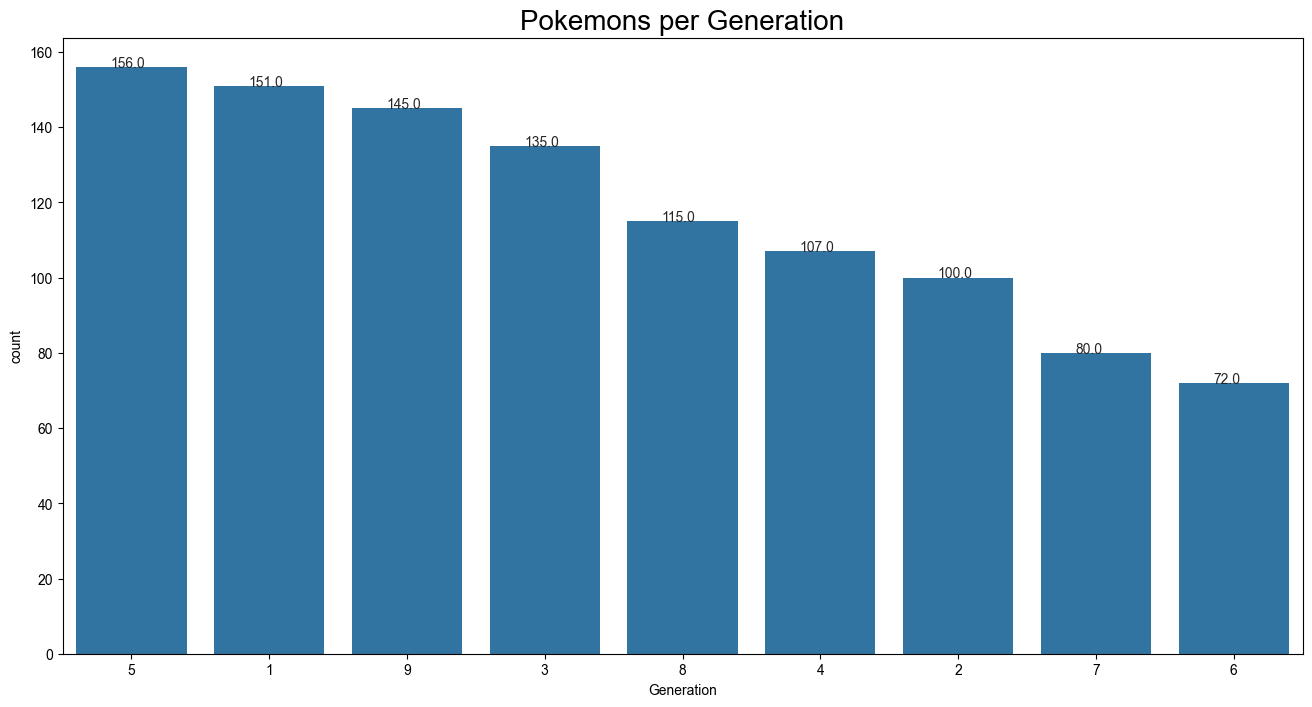

In [6]:
# Pokemons per Generation

plt.figure(figsize=(16,8))
ax = sns.countplot(data=pokemon_data, x = "Generation", order=pokemon_data["Generation"].value_counts().index)
plt.title("Pokemons per Generation",fontsize=20)
sns.set_style("dark")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

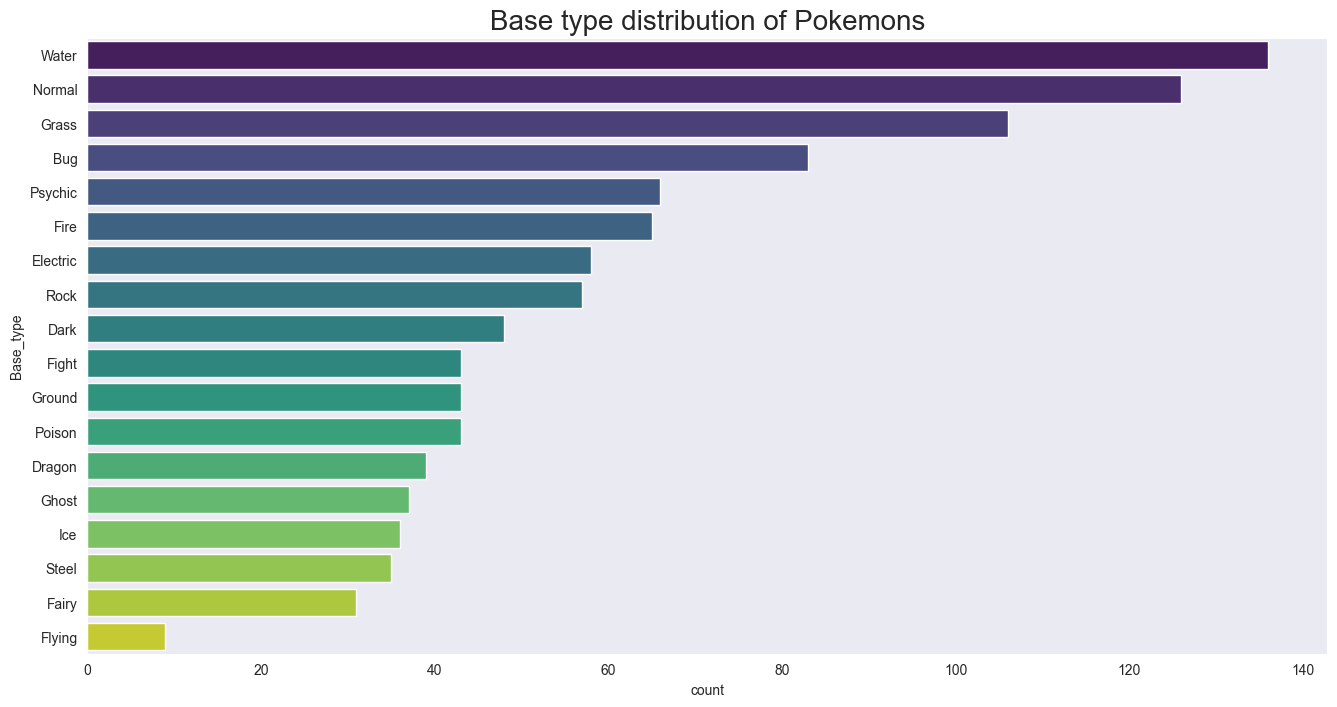

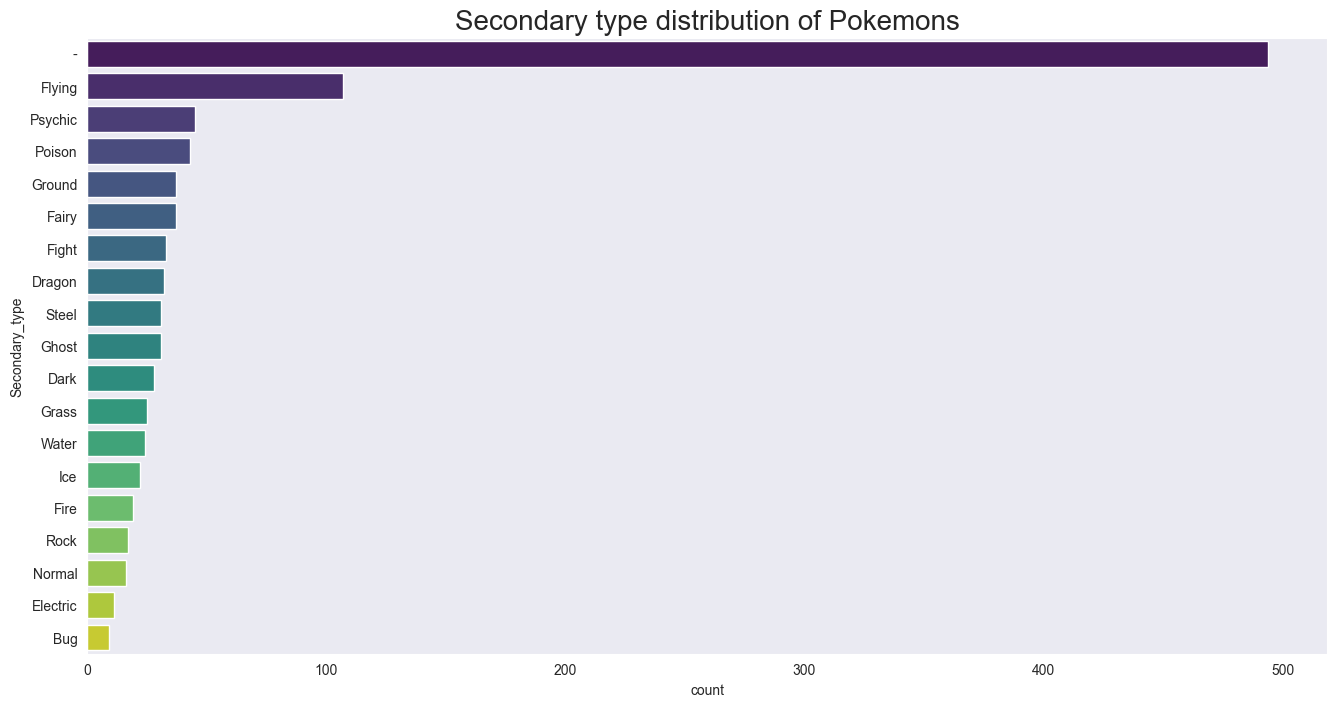

In [7]:
# Pokemon distribution according to types
#Base type
plt.figure(figsize=(16,8))
sns.countplot(data=pokemon_data, y="Base_type", order=pokemon_data["Base_type"].value_counts().index, palette="viridis")
plt.title("Base type distribution of Pokemons",fontsize=20)
sns.set_style("dark")
plt.show()
#Secondary type
plt.figure(figsize=(16,8))
sns.countplot(data=pokemon_data, y="Secondary_type", order=pokemon_data["Secondary_type"].value_counts().index,palette='viridis')
plt.title("Secondary type distribution of Pokemons",fontsize=20)
sns.set_style("dark")
plt.show()


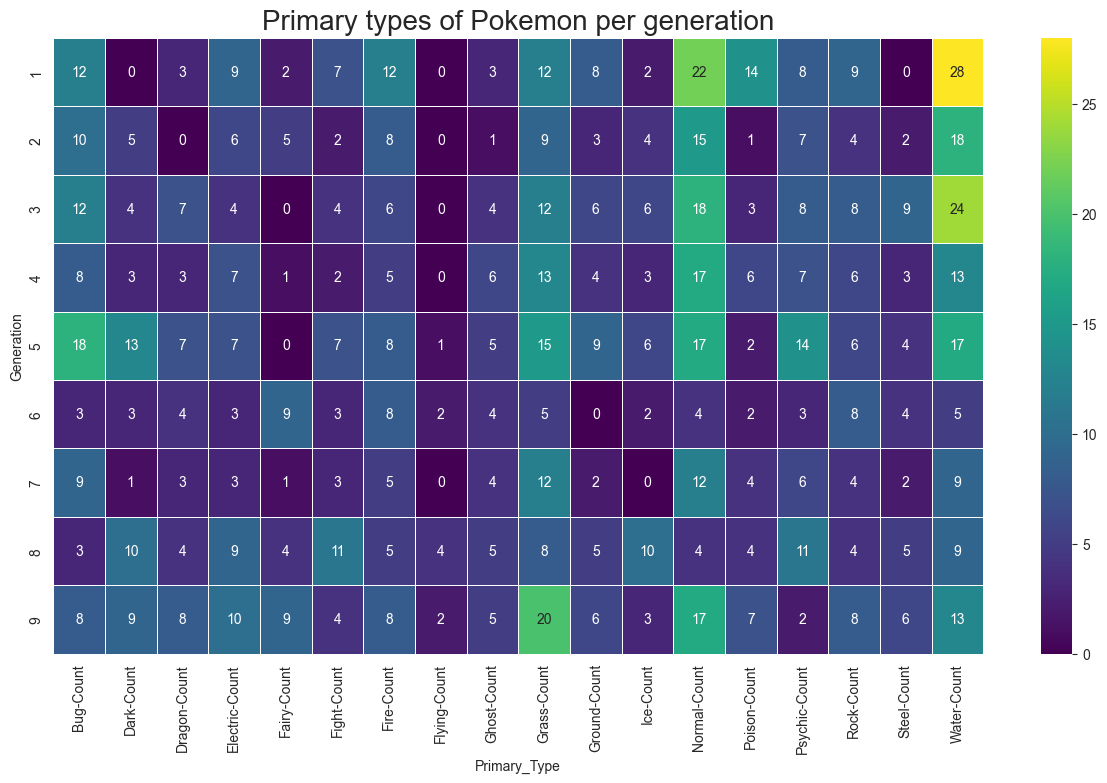

In [8]:
# Checking Primary types of pokemons per Generation

df1 = pd.DataFrame(pokemon_data.groupby('Generation')['Base_type'].value_counts())
df1.columns = ['Count']
df1 = df1.reset_index()
df1.columns = ['Generation','Type','Count']

df1 = df1.set_index(['Generation','Type']).unstack().swaplevel(0,1,1).sort_index(axis=1)

df1.fillna(value = 0, inplace = True)

fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(df1, annot = True, cmap = 'viridis',linewidths=0.5)
ax.set_xlabel('Primary_Type')
ax.set_title('Primary types of Pokemon per generation', fontsize = 20)
plt.show()


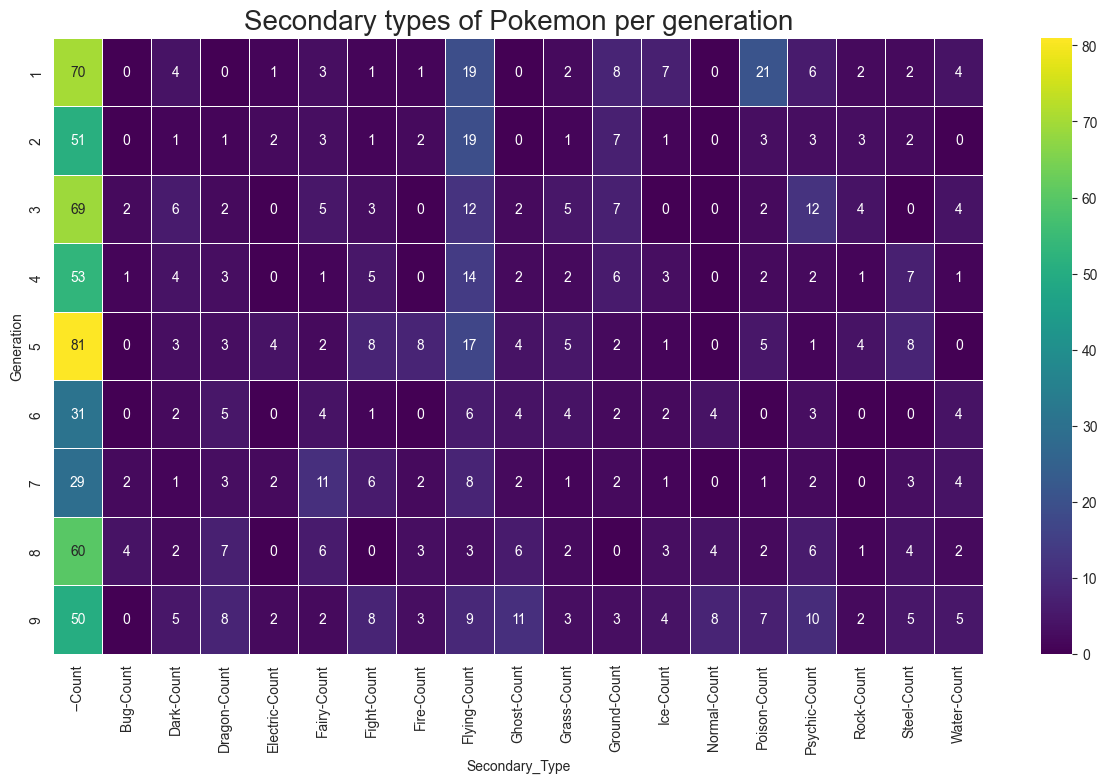

In [9]:
# Checking Secondary types of pokemons per Generation

df2 = pd.DataFrame(pokemon_data.groupby('Generation')['Secondary_type'].value_counts())
df2.columns = ['Count']
df2 = df2.reset_index()
df2.columns = ['Generation','Type','Count']

df2 = df2.set_index(['Generation','Type']).unstack().swaplevel(0,1,1).sort_index(axis=1)
df2.fillna(value = 0, inplace = True)

fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(df2, annot = True, cmap = 'viridis',linewidths=0.5)
ax.set_xlabel('Secondary_Type')
ax.set_title('Secondary types of Pokemon per generation', fontsize = 20)
plt.show()

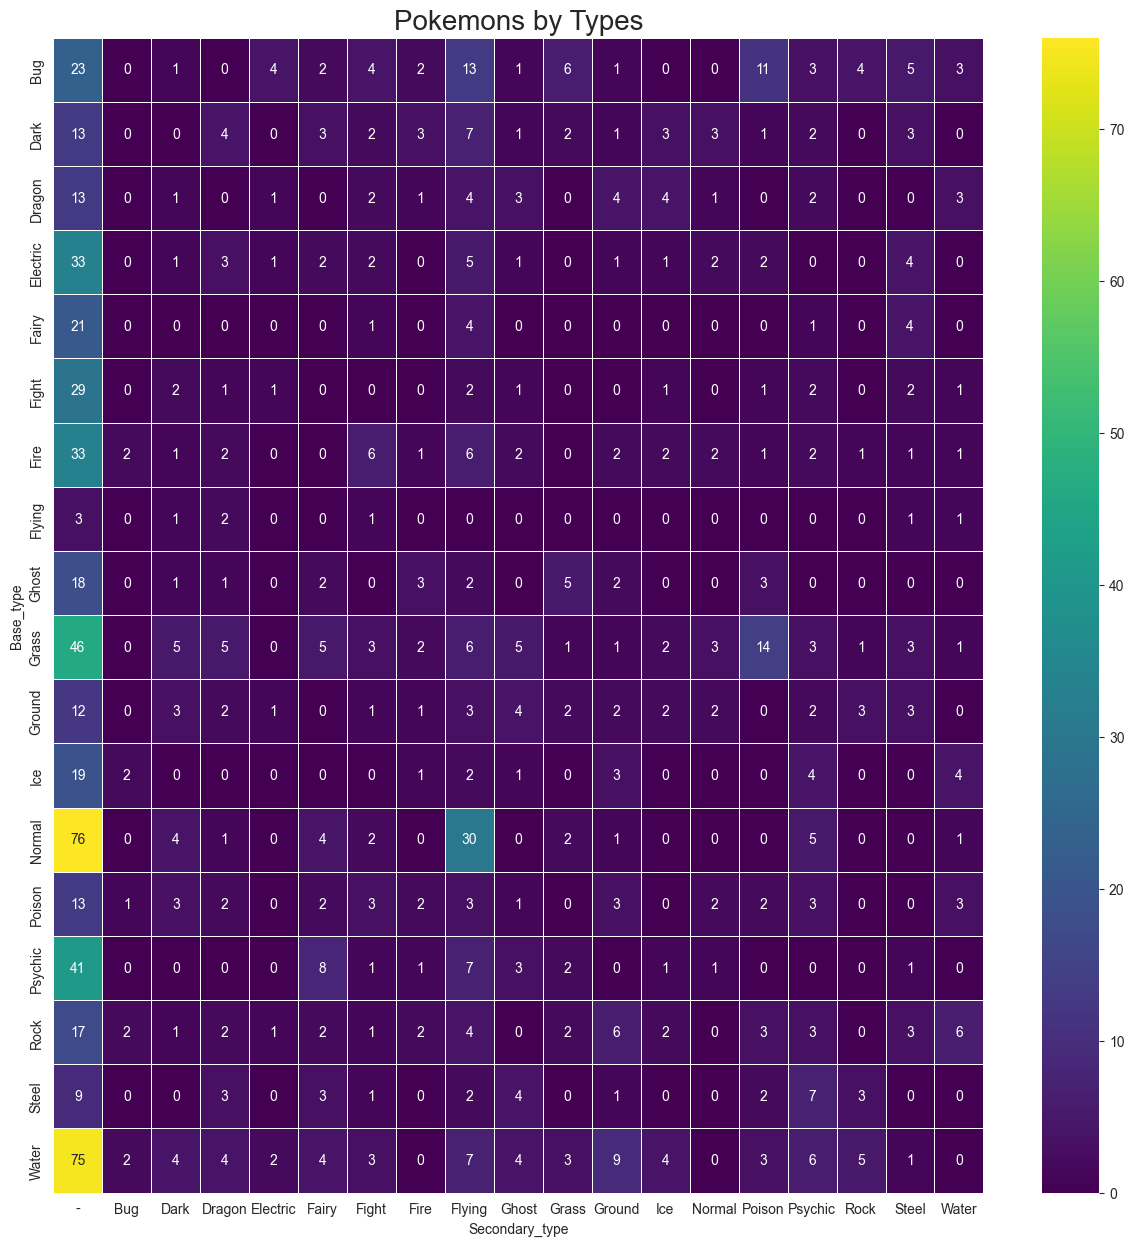

In [10]:
# Checking the combination of types per pokemons
df3 = pokemon_data.groupby('Base_type')['Secondary_type'].value_counts().unstack('Secondary_type',  fill_value=0)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df3, annot = True, cmap = 'viridis',linewidths=0.5)
ax.set_title('Pokemons by Types', fontsize = 20)
plt.show()

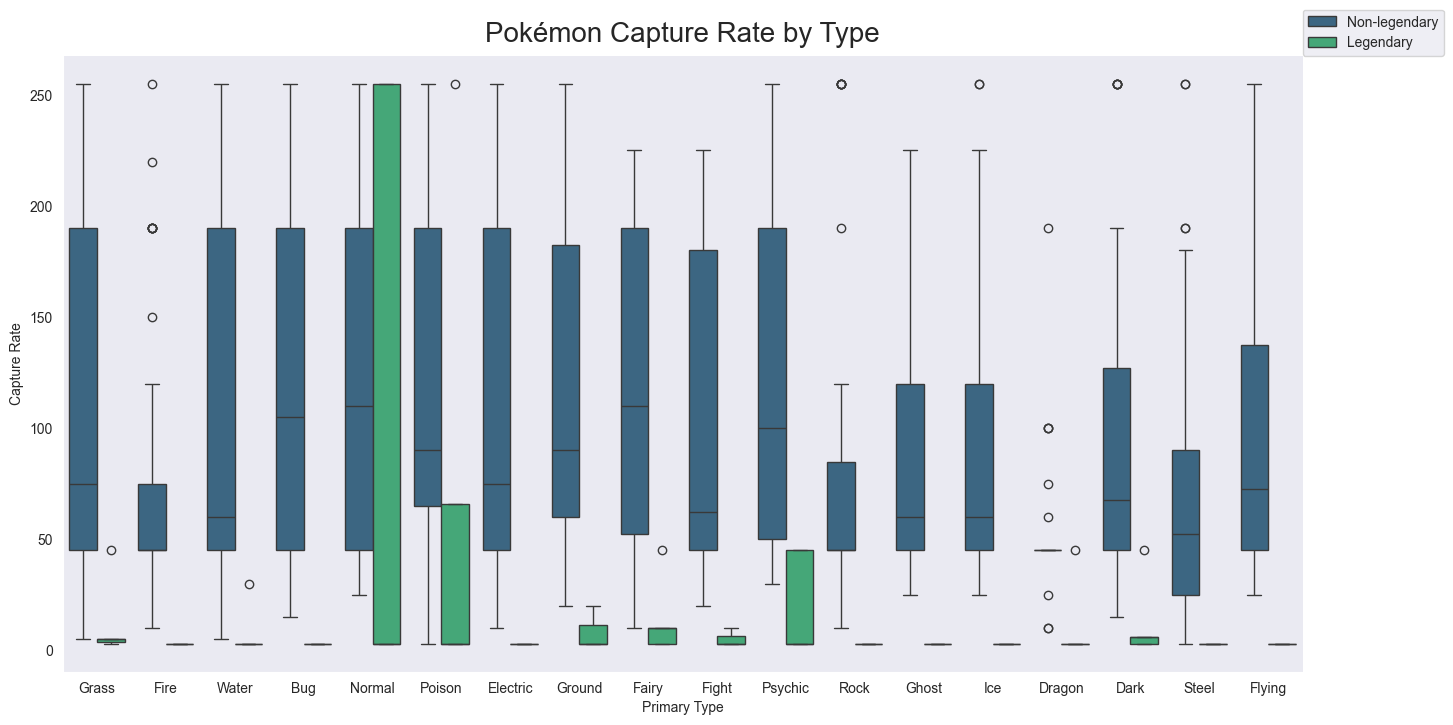

In [11]:
# Which pokemon are the easiest/difficult to catch according to type?

plt.figure(figsize=(16,8))
ax = sns.boxplot(data=pokemon_data, x='Base_type', y='Capture_rate',hue='Legendary',palette='viridis')
ax.set_xlabel(xlabel='Primary Type')
ax.set_ylabel(ylabel='Capture Rate')
ax.set_title('Pokémon Capture Rate by Type', pad=10, fontsize=20)

sns.despine(top=True, right=True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Non-legendary', 'Legendary'], loc=(1,1))

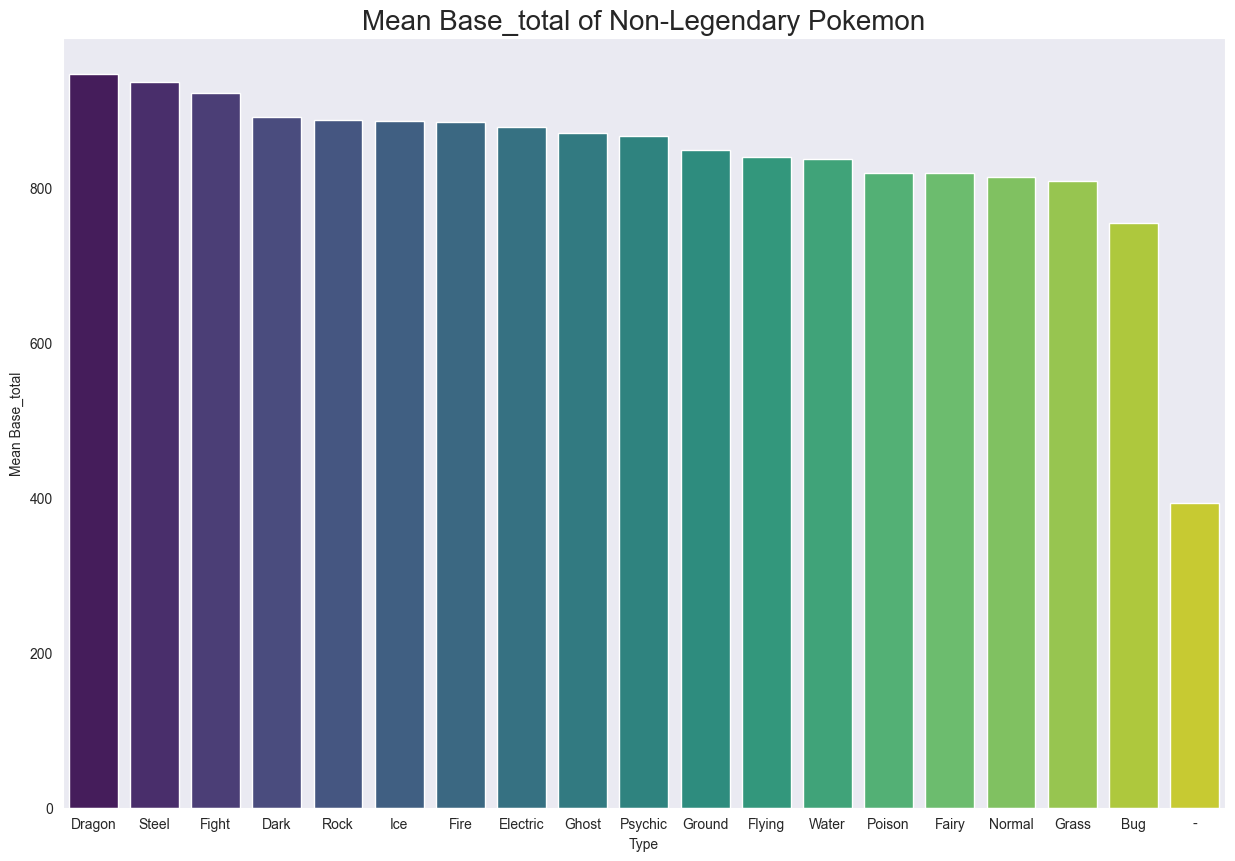

,Type,Mean Base_total
3,Dragon,945.599256
17,Steel,935.510256
6,Fight,922.198413
2,Dark,891.019444
16,Rock,887.375000
12,Ice,885.247209
7,Fire,884.383333
4,Electric,878.123077
9,Ghost,870.350000
15,Psychic,866.450000


In [12]:
#Best type?

df4 = pokemon_data[pokemon_data['Legendary'] == 0].groupby('Base_type')['Base_total'].mean()
df5 = pokemon_data[pokemon_data['Legendary'] == 0].groupby('Secondary_type')['Base_total'].mean() 

df_mean_bst = pd.DataFrame(df4.add(df5,fill_value=0))
df_mean_bst = df_mean_bst.reset_index()
df_mean_bst.columns = ['Type','Mean Base_total']
df_mean_bst = df_mean_bst.sort_values(by="Mean Base_total", ascending=False)

fig, ax= plt.subplots(figsize=(15,10))
sns.barplot(data=df_mean_bst, y= 'Mean Base_total', x='Type',palette='viridis')
ax.set_title('Mean Base_total of Non-Legendary Pokemon',fontsize=20)
sns.set_style("dark")
plt.show()
df_mean_bst.sort_values(by='Mean Base_total',ascending=False)

In [9]:
#Guardamos este df para los plots en streamlit
df_mean_bst.to_csv('dataset/df_mean_bst.csv')

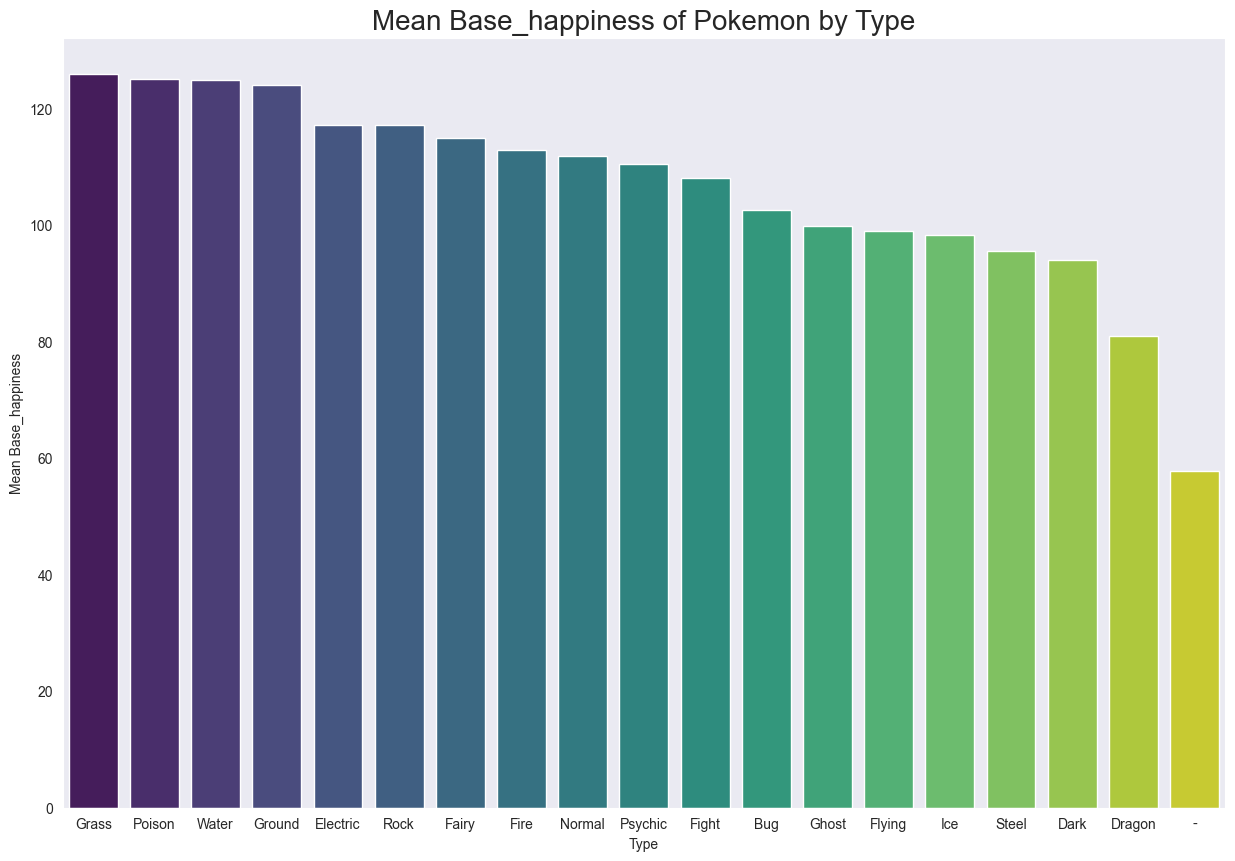

,Type,Mean Base_happiness
10,Grass,125.854227
14,Poison,125.120595
18,Water,124.821956
11,Ground,124.080324
4,Electric,117.190097
16,Rock,117.181660
5,Fairy,114.979655
7,Fire,112.933742
13,Normal,111.765786
15,Psychic,110.493968


In [23]:
#What is the happiest pokemon according to the type?

df6 = pokemon_data.groupby('Base_type')['Base_happiness'].mean()
df7 = pokemon_data.groupby('Secondary_type')['Base_happiness'].mean() 

df_mean_happy = pd.DataFrame(df6.add(df7,fill_value=0))
df_mean_happy = df_mean_happy.reset_index()
df_mean_happy.columns = ['Type','Mean Base_happiness']
df_mean_happy = df_mean_happy.sort_values(by="Mean Base_happiness", ascending=False)

fig, ax= plt.subplots(figsize=(15,10))
sns.barplot(data=df_mean_happy, y= 'Mean Base_happiness', x='Type', palette='viridis')
ax.set_title('Mean Base_happiness of Pokemon by Type',fontsize = 20)
plt.show()
df_mean_happy.sort_values(by='Mean Base_happiness',ascending=False)

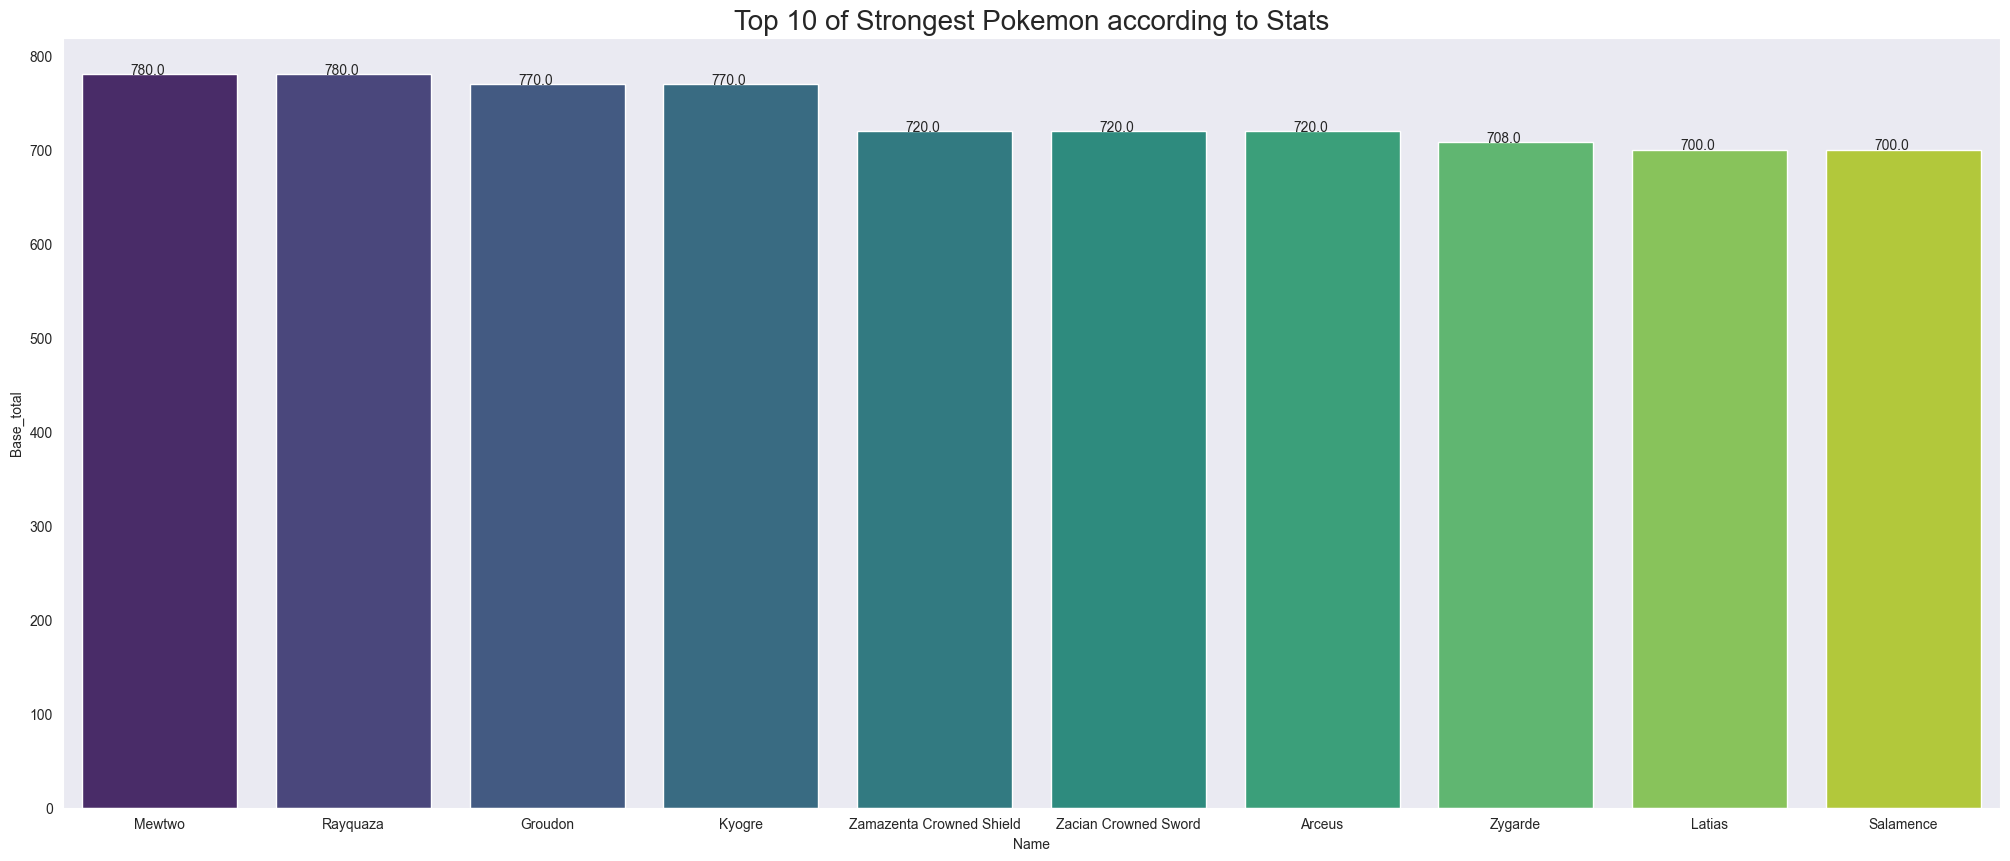

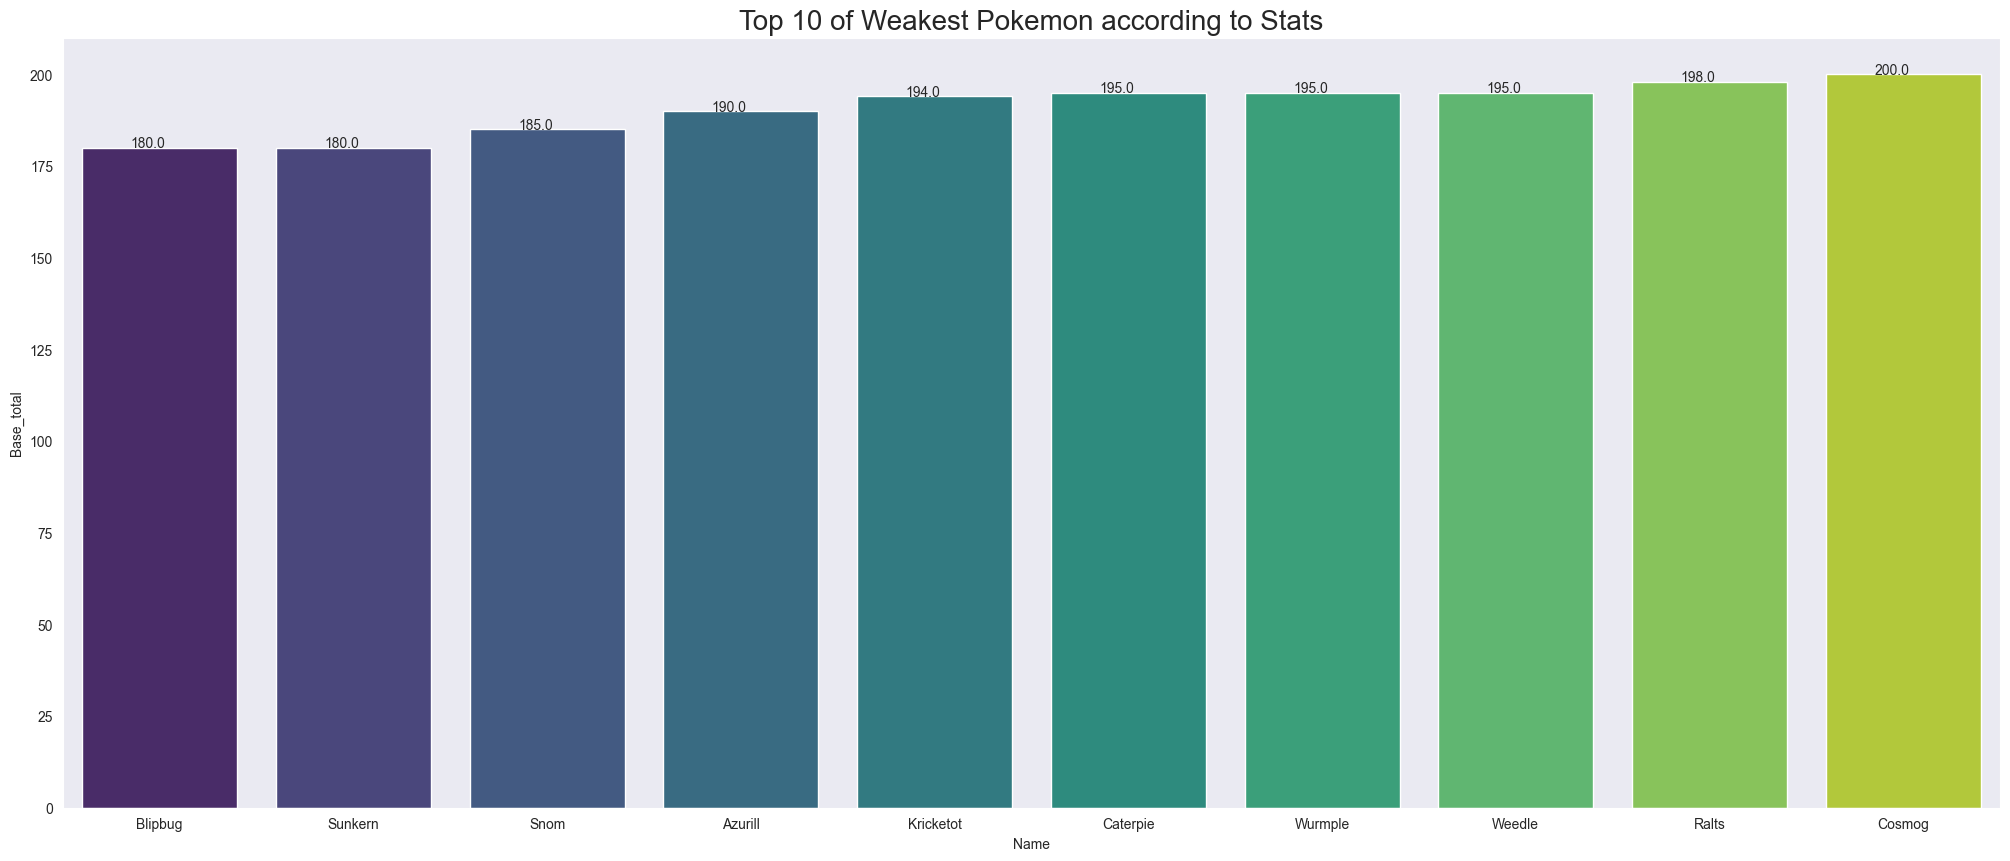

In [ ]:
# Ranking of Best Pokemon according to stats?

top_10 = pokemon_data.sort_values(by='Base_total',ascending=False).reset_index()[:10]
fig, ax= plt.subplots(figsize=(25,10))
sns.barplot(data=top_10, x=top_10['Name'], y=top_10['Base_total'],palette='viridis')
ax.set_title('Top 10 of Strongest Pokemon according to Stats',fontsize=20)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

sns.set_style("dark")
plt.show()

# Ranking top 10 Worst Pokemon according to stats?

low_10 = pokemon_data.sort_values(by='Base_total',ascending=True).reset_index()[:10]
fig, ax= plt.subplots(figsize=(25,10))
sns.barplot(data=low_10, x=low_10['Name'], y=low_10['Base_total'],palette='viridis')
ax.set_title('Top 10 of Weakest Pokemon according to Stats',fontsize=20)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

sns.set_style("dark")
plt.show()

IndexError: index 3 is out of bounds for axis 0 with size 3

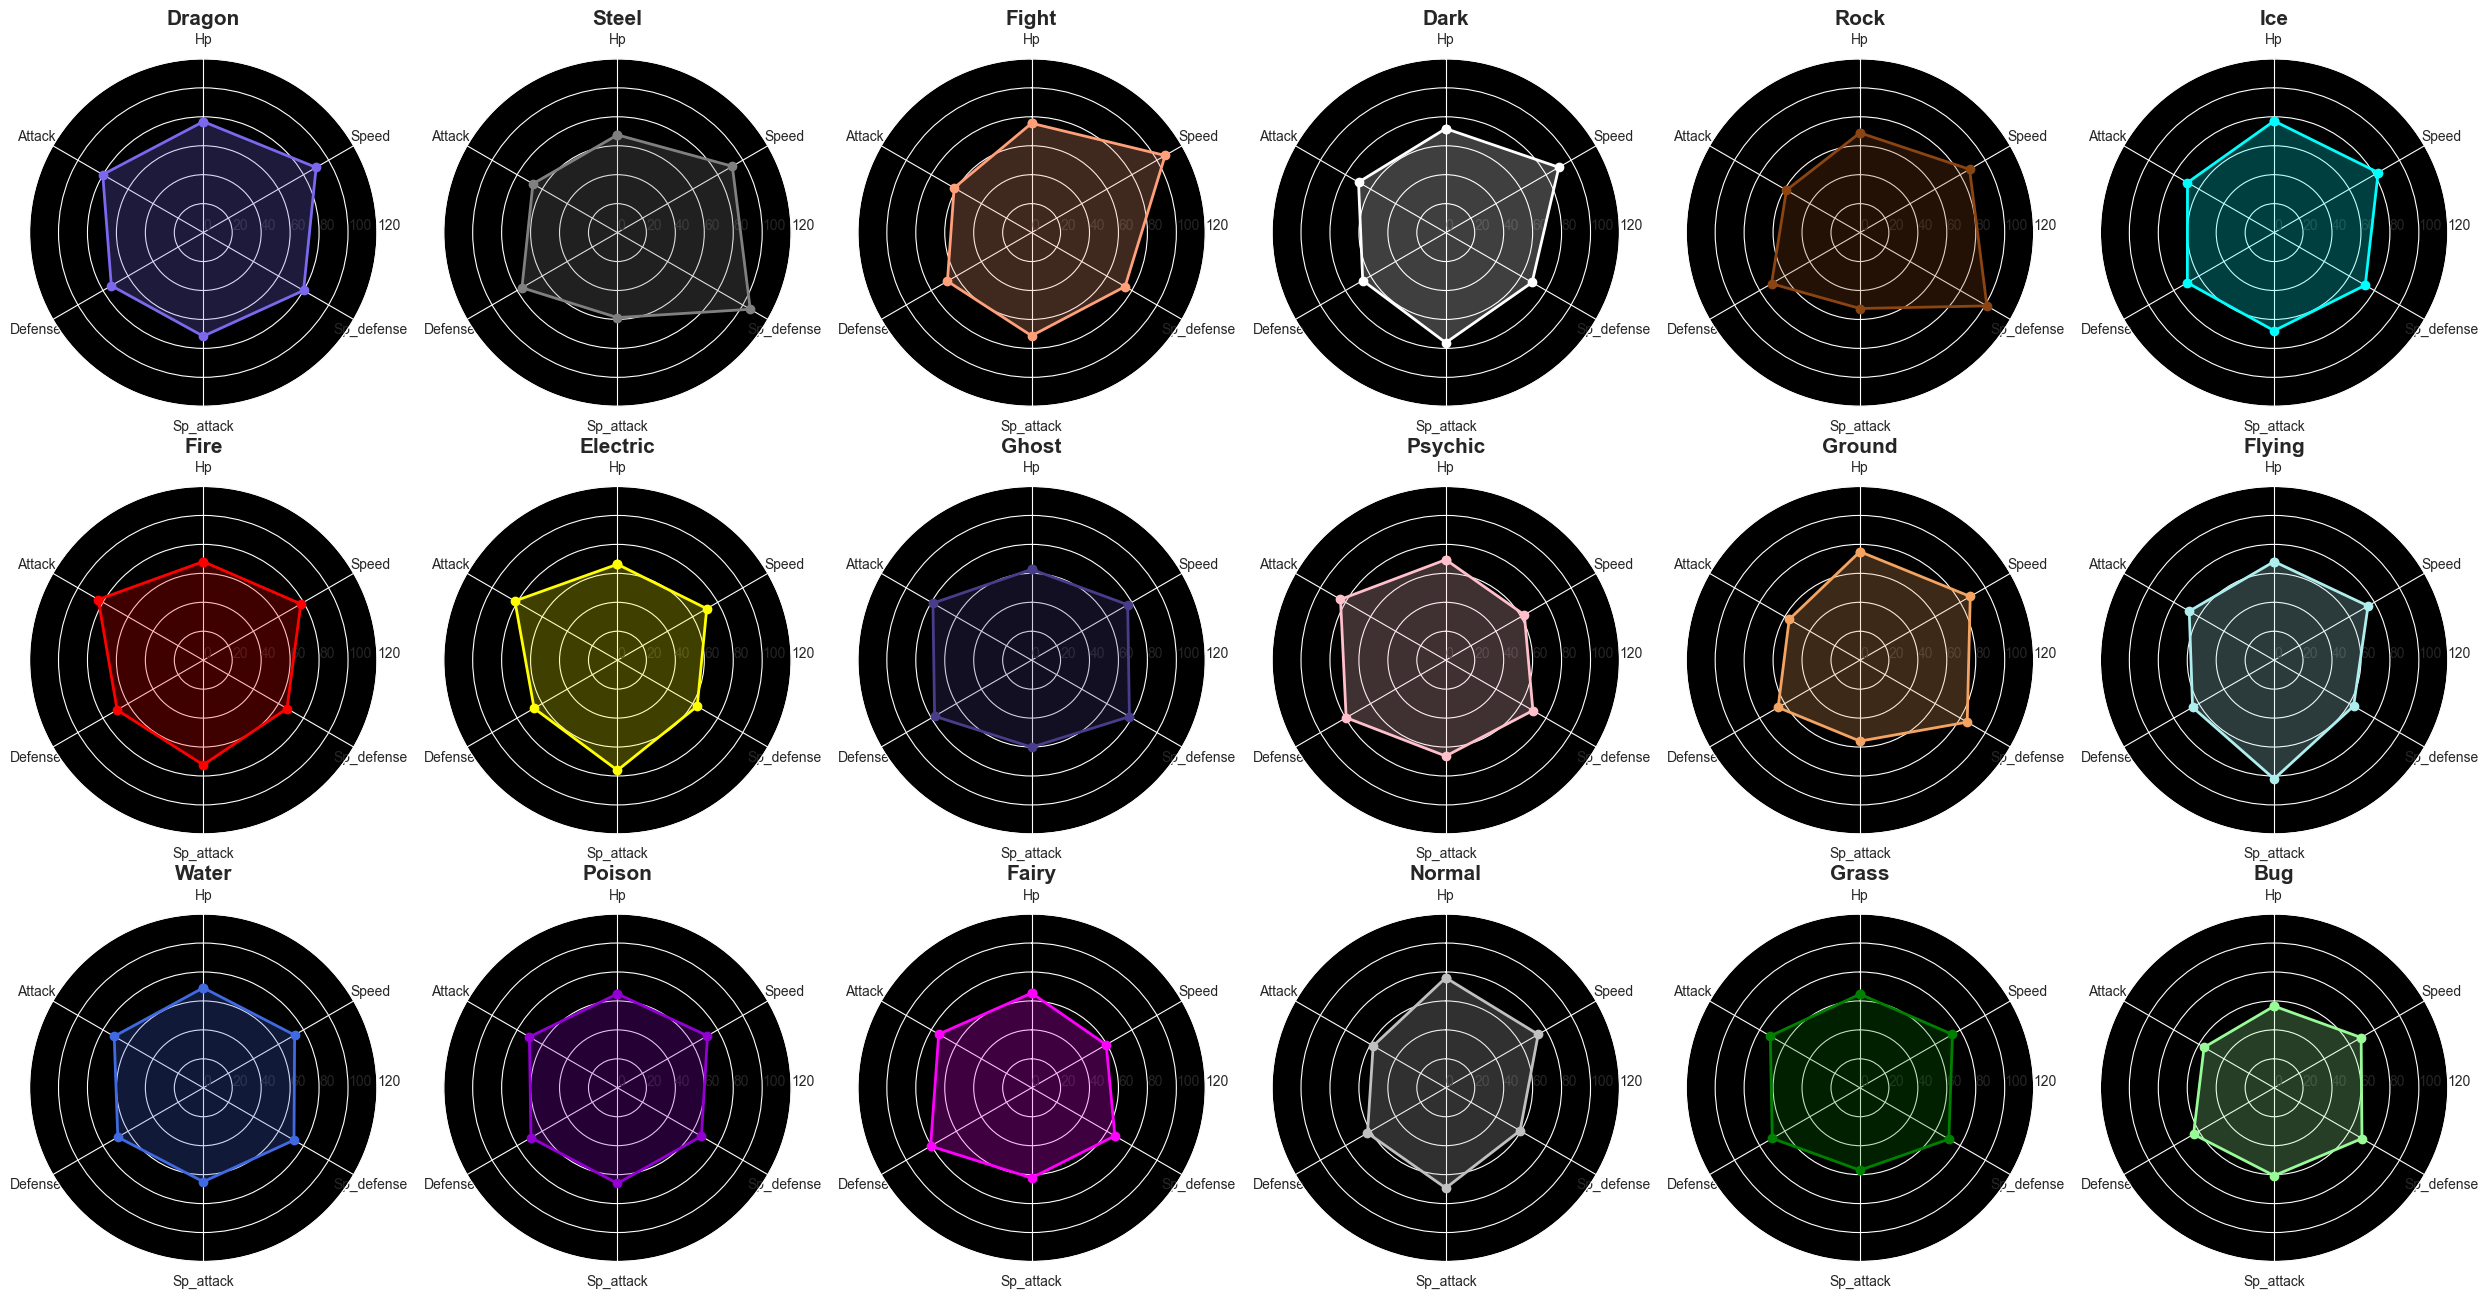

In [26]:
labels=np.array(['Hp', 'Attack', 'Defense', 'Sp_attack', 'Sp_defense', 'Speed'])
angles=np.linspace(0,2*np.pi, len(labels), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, nrows = 3, ncols = 6, figsize=(25,25))
fig.patch.set_facecolor('white')
counter = 0
ncols = 6

colors = {'Fire':'red', 'Water':'royalblue', 'Grass':'green','Poison':'darkviolet','Steel':'grey','Bug':'palegreen','Normal':'silver','Dark':'white','Electric':'yellow',
          'Ground':'sandybrown','Rock':'saddlebrown','Ice':'aqua','Fairy':'fuchsia','Fight':'lightsalmon','Psychic':'pink','Ghost':'darkslateblue','Dragon':'mediumslateblue',
          'Flying':'paleturquoise'}

for i in df_mean_bst.sort_values(by = 'Mean Base_total', ascending = False)['Type']:

    type_df=pokemon_data[((pokemon_data['Base_type']==i) | ((pokemon_data['Secondary_type'])==i)) &(pokemon_data['Legendary']==0)][['Hp', 'Attack', 'Defense', 'Sp_attack', 'Sp_defense', 'Speed']]
    type_mean_df = type_df.mean(axis = 0)

    j =  counter % ncols
    k = (counter-j) // ncols
        
    stats = [type_mean_df.values[0],type_mean_df.values[3],type_mean_df.values[4],type_mean_df.values[5],type_mean_df.values[2],type_mean_df.values[1]]
    stats=np.concatenate((stats,[stats[0]]))
        
    ax[k,j].set_theta_zero_location("N")
    ax[k,j].plot(angles, stats, 'o-', linewidth=2,color = colors[i])
    ax[k,j].fill(angles, stats, alpha=0.25, color = colors[i])
    ax[k,j].set_rticks([0,20,40,60,80,100,120])
    ax[k,j].set_rlabel_position(-90.0)
    ax[k,j].set_thetagrids((angles * 180/np.pi)[0:6], labels)
    ax[k,j].set_title(i, fontweight='bold',fontsize= 15)
    ax[k,j].grid(True)
    ax[k,j].set_facecolor('black')
    counter  = counter +1
    plt.tight_layout()
        
        

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=None)
plt.tight_layout()
plt.grid(visible=True)
sns.set_style("white")
plt.show()


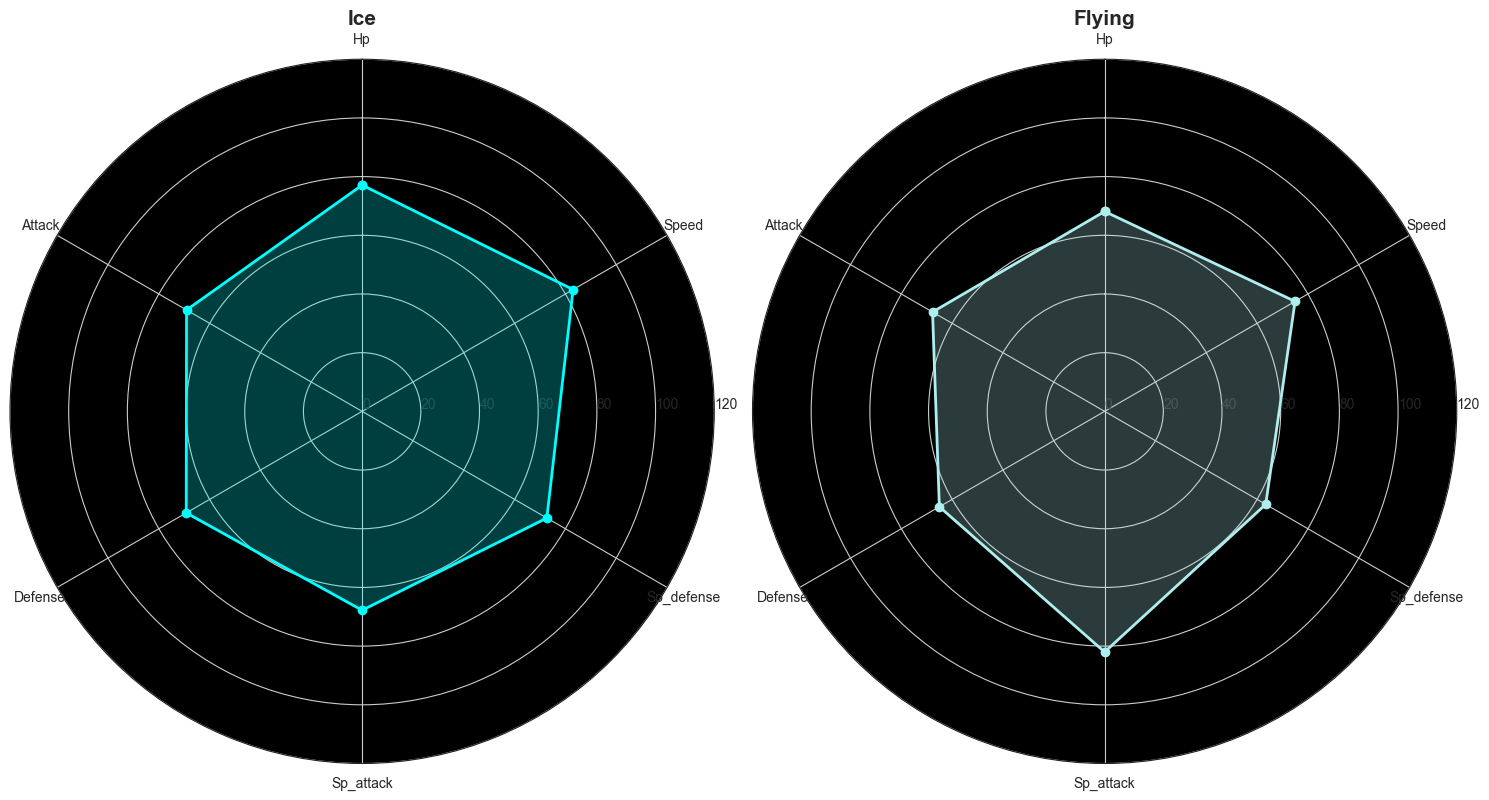

In [ ]:
#suponer que el pokemon que quieres ver tiene dos condiciones: 
nombre = input('Que pokemon es?').title()
tipos =pokemon_data[pokemon_data["Name"]==nombre][["Base_type", "Secondary_type"]].values.tolist()[0]

if '-' in tipos:
    tipos=tipos[0]
    subset_types=df_mean_bst[df_mean_bst["Type"].str.contains(tipos)]
    labels=np.array(['Hp', 'Attack', 'Defense', 'Sp_attack', 'Sp_defense', 'Speed'])
    angles=np.linspace(0,2*np.pi, len(labels), endpoint=False)
    angles=np.concatenate((angles,[angles[0]]))

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, nrows = 1, ncols = 1, figsize=(15,15))
    fig.patch.set_facecolor('white')
    counter = 0
    ncols = 1

    colors = {'Fire':'red', 'Water':'royalblue', 'Grass':'green','Poison':'darkviolet','Steel':'grey','Bug':'palegreen','Normal':'silver','Dark':'white','Electric':'yellow',
            'Ground':'sandybrown','Rock':'saddlebrown','Ice':'aqua','Fairy':'fuchsia','Fight':'lightsalmon','Psychic':'pink','Ghost':'darkslateblue','Dragon':'mediumslateblue',
            'Flying':'paleturquoise'}

    type_df=pokemon_data[((pokemon_data['Base_type']==tipos)) &(pokemon_data['Legendary']==0)][['Hp', 'Attack', 'Defense', 'Sp_attack', 'Sp_defense', 'Speed']]
    type_mean_df = type_df.mean(axis = 0)

    # j =  counter % ncols
    k = (counter-j) // ncols

    stats = [type_mean_df.values[0],type_mean_df.values[3],type_mean_df.values[4],type_mean_df.values[5],type_mean_df.values[2],type_mean_df.values[1]]
    stats=np.concatenate((stats,[stats[0]]))

    ax.set_theta_zero_location("N")
    ax.plot(angles, stats, 'o-', linewidth=2,color = colors[tipos])
    ax.fill(angles, stats, alpha=0.25, color = colors[tipos])
    ax.set_rticks([0,20,40,60,80,100,120])
    ax.set_rlabel_position(-90.0)
    ax.set_thetagrids((angles * 180/np.pi)[0:6], labels)
    ax.set_title('Water', fontweight='bold',fontsize= 15)
    ax.grid(True)
    ax.set_facecolor('black')
    counter  = counter +1
    plt.tight_layout()

else:
    subset_types=df_mean_bst[df_mean_bst["Type"].isin(tipos)]
    labels=np.array(['Hp', 'Attack', 'Defense', 'Sp_attack', 'Sp_defense', 'Speed'])
    angles=np.linspace(0,2*np.pi, len(labels), endpoint=False)
    angles=np.concatenate((angles,[angles[0]]))

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, nrows = 1, ncols = 2, figsize=(15,15))
    fig.patch.set_facecolor('white')
    counter = 0
    ncols = 1

    colors = {'Fire':'red', 'Water':'royalblue', 'Grass':'green','Poison':'darkviolet','Steel':'grey','Bug':'palegreen','Normal':'silver','Dark':'white','Electric':'yellow',
            'Ground':'sandybrown','Rock':'saddlebrown','Ice':'aqua','Fairy':'fuchsia','Fight':'lightsalmon','Psychic':'pink','Ghost':'darkslateblue','Dragon':'mediumslateblue',
            'Flying':'paleturquoise'}

    for i in subset_types.sort_values(by = 'Mean Base_total', ascending = False)['Type']:

        type_df=pokemon_data[((pokemon_data['Base_type']==i) | ((pokemon_data['Secondary_type'])==i)) &(pokemon_data['Legendary']==0)][['Hp', 'Attack', 'Defense', 'Sp_attack', 'Sp_defense', 'Speed']]
        type_mean_df = type_df.mean(axis = 0)

        #j =  counter % ncols
        k = (counter-j) // ncols
            
        stats = [type_mean_df.values[0],type_mean_df.values[3],type_mean_df.values[4],type_mean_df.values[5],type_mean_df.values[2],type_mean_df.values[1]]
        stats=np.concatenate((stats,[stats[0]]))
            
        ax[k].set_theta_zero_location("N")
        ax[k].plot(angles, stats, 'o-', linewidth=2,color = colors[i])
        ax[k].fill(angles, stats, alpha=0.25, color = colors[i])
        ax[k].set_rticks([0,20,40,60,80,100,120])
        ax[k].set_rlabel_position(-90.0)
        ax[k].set_thetagrids((angles * 180/np.pi)[0:6], labels)
        ax[k].set_title(i, fontweight='bold',fontsize= 15)
        ax[k].grid(True)
        ax[k].set_facecolor('black')
        counter  = counter +1
        plt.tight_layout()
            
            

    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=None)
    plt.tight_layout()
    plt.grid(visible=True)
    sns.set_style("white")
    plt.show()


# Dynamic Visuals

In [ ]:
# Distibution of types
base_type_counts = pokemon_data["Base_type"].value_counts(ascending=True).reset_index()
base_type_counts.columns = ["Type", "Count"]

secondary_type_counts = pokemon_data["Secondary_type"].value_counts(ascending=True).reset_index()
secondary_type_counts.columns = ["Type", "Count"]

fig = px.bar(base_type_counts, 
             x="Count", 
             y="Type", 
             orientation="h",  
             color="Count",  
             color_continuous_scale="viridis", 
             title="Pokémon Type Distribution")

# dropdown Base_type and Secondary_type
fig.update_layout(
    width=1200, height=700,  
    updatemenus=[
        {
            "buttons": [
                {
                    "label": "Base Type",
                    "method": "update",
                    "args": [{"x": [base_type_counts["Count"]], "y": [base_type_counts["Type"]]}]
                },
                {
                    "label": "Secondary Type",
                    "method": "update",
                    "args": [{"x": [secondary_type_counts["Count"]], "y": [secondary_type_counts["Type"]]}]
                }
            ],
            "direction": "down",
            "showactive": True,
        }
    ]
)


fig.show()


In [ ]:
# Which pokemon are the easiest/difficult to catch according to type?
fig = px.box(pokemon_data, 
             x='Base_type', 
             y='Capture_rate', 
             color='Legendary',  
             title='Pokémon Capture Rate by Type',
             labels={'Base_type': 'Primary Type', 'Capture_rate': 'Capture Rate'},
             color_discrete_map={True: 'green', False: 'blue'})  


fig.update_layout(width=1400, height=700, 
                  boxmode='group',  
                  legend_title="Legendary Status")


fig.show()


In [67]:
# Group the DataFrame by Base and Secondary types and calculate the mean of Base_total and happiness
df_grouped = pokemon_data.groupby(['Secondary_type', 'Base_type']).agg({'Base_total': 'mean', 'Base_happiness': 'mean'}).reset_index()

# Create the scatter plot using Plotly Express
fig = px.scatter(df_grouped, x='Base_happiness', y='Base_total',
                 color='Base_type',
                 color_discrete_sequence=px.colors.qualitative.Dark24,
                 size='Base_total',
                 size_max=20,
                 title='Mean Base total and Happiness by Pokemon Types')

# Set the axis titles
fig.update_xaxes(title_text='Mean Base_happiness')
fig.update_yaxes(title_text='Mean Base_total')
fig.update_layout(width=1400,  
                  height=700,)

# Show the plot
fig.show()



In [68]:
# Suponiendo que 'pokemon_data' es tu DataFrame y contiene la columna 'Base_type'
fig = px.bar(pokemon_data, 
             y="Base_type", 
             title="Base type distribution of Pokemons",
             category_orders={"Base_type": pokemon_data["Base_type"].value_counts().index},
             color="Base_type", # Esto agrega un color por categoría
             color_continuous_scale="Viridis",
             height=600)  # Esto es para la paleta de colores similar a 'viridis'

fig.update_layout(
    title={'font': {'size': 20}},
    xaxis_title='Count',  # Título del eje x
    yaxis_title='Base Type',  # Título del eje y
    template='plotly_dark'  # Estilo oscuro
)
fig.update_layout(width=1400,  
                  height=700,)

fig.show()


In [69]:
#Best type?
#Extracting df to pass to plots
df4 = pokemon_data[pokemon_data['Legendary'] == 0].groupby('Base_type')['Base_total'].mean().reset_index()
df5 = pokemon_data[pokemon_data['Legendary'] == 0].groupby('Secondary_type')['Base_total'].mean().reset_index()

df4 = df4.sort_values(by="Base_total", ascending=False)
df5 = df5.sort_values(by="Base_total", ascending=False)

# Crear gráfico con Plotly Express
fig = px.bar(df_mean_bst, 
             x='Type', 
             y='Mean Base_total', 
             title='Mean Base_total of Non-Legendary Pokemon',
             color='Mean Base_total', 
             color_continuous_scale='viridis')

# Añadir el dropdown interactivo
fig.update_layout(width=1400,  
                  height=700,
    updatemenus=[
        {
            "buttons": [
                {
                    "label": "Base Type",
                    "method": "update",
                    "args": [{"x": [df4['Base_type']], "y": [df4['Base_total']],
                              "marker.color": [df4['Base_total']]}]
                },
                {
                    "label": "Secondary Type",
                    "method": "update",
                    "args": [{"x": [df5['Secondary_type']], "y": [df5['Base_total']],
                              "marker.color": [df5['Base_total']]}]
                }
            ],
            "direction": "down",
            "showactive": True,
        }
    ]
)
# Mostrar gráfico
fig.show()


In [ ]:
#Extracting df to pass to plots
df6 = pokemon_data.groupby('Base_type')['Base_happiness'].mean().reset_index()
df7 = pokemon_data.groupby('Secondary_type')['Base_happiness'].mean().reset_index()

df6 = df6.sort_values(by="Base_happiness", ascending=False)
df7 = df7.sort_values(by="Base_happiness", ascending=False)

# Crear gráfico con Plotly Express
fig = px.bar(df6, 
             x='Base_type', 
             y='Base_happiness', 
             title='Mean Base_happiness of Pokemon by Type',
             color='Base_happiness', 
             color_continuous_scale='viridis')

# Añadir el dropdown interactivo

fig.update_layout(width=1400,  
                  height=700,
    updatemenus=[
        {
            "buttons": [
                {
                    "label": "Base Type",
                    "method": "update",
                    "args": [{"x": [df6['Base_type']], "y": [df6['Base_happiness']],
                              "marker.color": [df6['Base_happiness']]}]
                },
                {
                    "label": "Secondary Type",
                    "method": "update",
                    "args": [{"x": [df7['Secondary_type']], "y": [df7['Base_happiness']],
                              "marker.color": [df7['Base_happiness']]}]
                }
            ],
            "direction": "down",
            "showactive": True,
        }
    ]
)
# Mostrar gráfico
fig.show()

In [71]:
# Ranking of Worst Pokemon according to stats?
pokemon_ranked = pokemon_data.sort_values(by='Base_total', ascending=False).reset_index(drop=True)

# Different rankings
top_10 = pokemon_ranked.head(10)
top_15 = pokemon_ranked.head(15)
top_20 = pokemon_ranked.head(20)

# Figure
fig = px.bar(top_10, 
             x='Name', 
             y='Base_total', 
             text='Base_total',  
             color='Base_total', 
             color_continuous_scale='viridis',
             title='Top Strongest Pokémon According to Stats')


fig.update_traces(texttemplate='%{text}', textposition='outside')
# Dropdown and height
fig.update_layout(yaxis_title="Base Total Stats", 
                  xaxis_title="Pokémon", 
                  width=1400,  
                  height=700,  
                  updatemenus=[  
                      {
                          "buttons": [
                              {
                                  "label": "Top 10",
                                  "method": "update",
                                  "args": [{"x": [top_10['Name']], "y": [top_10['Base_total']],
                                            "marker.color": [top_10['Base_total']],
                                            "text": [top_10['Base_total']]}]
                              },
                              {
                                  "label": "Top 15",
                                  "method": "update",
                                  "args": [{"x": [top_15['Name']], "y": [top_15['Base_total']],
                                            "marker.color": [top_15['Base_total']],
                                            "text": [top_15['Base_total']]}]
                              },
                              {
                                  "label": "Top 20",
                                  "method": "update",
                                  "args": [{"x": [top_20['Name']], "y": [top_20['Base_total']],
                                            "marker.color": [top_20['Base_total']],
                                            "text": [top_20['Base_total']]}]
                              }
                          ],
                          "direction": "down",
                          "showactive": True,
                      }
                  ])


fig.show()


In [72]:
# Ranking of Worst Pokemon according to stats?
pokemon_ranked = pokemon_data.sort_values(by='Base_total', ascending=True).reset_index(drop=True)

# Different rankings
worst_10 = pokemon_ranked.head(10)
worst_15 = pokemon_ranked.head(15)
worst_20 = pokemon_ranked.head(20)

# Figure
fig = px.bar(worst_10, 
             x='Name', 
             y='Base_total', 
             text='Base_total',  
             color='Base_total', 
             color_continuous_scale='viridis',
             title='Top Weakest Pokémon According to Stats')


fig.update_traces(texttemplate='%{text}', textposition='outside')
#Dropdown menu and height
fig.update_layout(yaxis_title="Base Total Stats", 
                  xaxis_title="Pokémon", 
                  width=1400,  
                  height=700,  
                  updatemenus=[  
                      {
                          "buttons": [
                              {
                                  "label": "Top 10",
                                  "method": "update",
                                  "args": [{"x": [worst_10['Name']], "y": [worst_10['Base_total']],
                                            "marker.color": [worst_10['Base_total']],
                                            "text": [worst_10['Base_total']]}]
                              },
                              {
                                  "label": "Top 15",
                                  "method": "update",
                                  "args": [{"x": [worst_15['Name']], "y": [worst_15['Base_total']],
                                            "marker.color": [worst_15['Base_total']],
                                            "text": [worst_15['Base_total']]}]
                              },
                              {
                                  "label": "Top 20",
                                  "method": "update",
                                  "args": [{"x": [worst_20['Name']], "y": [worst_20['Base_total']],
                                            "marker.color": [worst_20['Base_total']],
                                            "text": [worst_20['Base_total']]}]
                              }
                          ],
                          "direction": "down",
                          "showactive": True,
                      }
                  ])


fig.show()


# Modeling Legendary

In [2]:
pokemon_data = pd.read_csv('dataset/pokemon_final.csv')
pokemon_data.drop(columns='Unnamed: 0',inplace=True)
# Modify fight to have it the same way as the against column
pokemon_data['Base_type'].replace('Fighting','Fight',inplace=True)
pokemon_data['Secondary_type'].replace('Fighting','Fight',inplace=True)

In [3]:
# Select legendaries subset

legendaries = pokemon_data[['Generation', 'Legendary', 'Attack', 'Defense', 'Weight_kg', 'Height_m', 'Capture_rate',
       'Hp', 'Sp_attack', 'Sp_defense', 'Speed','Base_egg_steps', 'Base_happiness','Number_of_Abilities','Experience_growth']]
legendaries = legendaries[legendaries['Generation'] != 9.0]

In [17]:
# VIF for legendaries DF to check for multicoleanity

def calcular_vif(pokemon_data):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = legendaries.columns
    vif_data["VIF"] = [variance_inflation_factor(legendaries.values, i) for i in range(legendaries.shape[1])]
    return vif_data


calcular_vif(legendaries)

,Variable,VIF
0,Generation,5.932360
1,Legendary,2.470581
2,Attack,13.427196
3,Defense,13.447757
4,Weight_kg,2.661103
5,Height_m,3.849972
6,Capture_rate,4.455286
7,Hp,13.276712
8,Sp_attack,10.815246
9,Sp_defense,14.925329


In [4]:
# Split data para train y test of legendaries

X = legendaries.drop(columns="Legendary",axis=1)
Y = legendaries["Legendary"]

# Change test size to 0.4 because the data set has a low rate of legendaries
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42, stratify=Y)

# Normalize data to use Logitic model
scaler = StandardScaler()

# Fitting
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       333
         1.0       0.91      0.85      0.88        34

    accuracy                           0.98       367
   macro avg       0.95      0.92      0.93       367
weighted avg       0.98      0.98      0.98       367



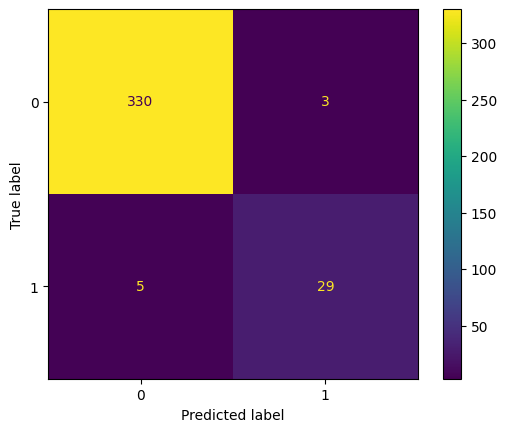

In [5]:
# Check of model to predict legendaries. Looking: KNN, logisitic, Decision Tree y Random Forest because we want a classifier.

# Logisitic Regression

model = LogisticRegression(random_state=42)
model.fit(X_train,y_train)
model.score(X_test,y_test)

# Prediction of the model
y_predicted = model.predict(X_test)
#Confussion Matrix 
confusion_matrix(y_test,y_predicted)
print(classification_report(y_test,y_predicted))
cm=confusion_matrix(y_test, y_predicted)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [6]:
#Recall score
print('Recall:',recall_score(y_test,y_predicted))

Recall: 0.8529411764705882


# Logisitc recall 0.85

Text(0.5, 1.0, 'Best number of neighbors')

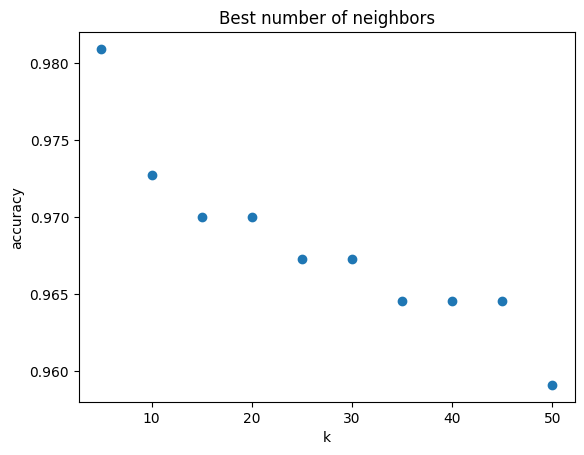

In [7]:
# KNN hyper parameter tunning
knn = [5,10,15,20,25,30,35,40,45,50]
scores = []
for i in knn:
    knn_reg = KNeighborsClassifier(n_neighbors=i, weights='distance', metric="manhattan")  
    knn_reg.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)
    scores.append(knn_reg.score(X_test,y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(knn,scores)
plt.title("Best number of neighbors")



0.9809264305177112
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       333
         1.0       0.91      0.88      0.90        34

    accuracy                           0.98       367
   macro avg       0.95      0.94      0.94       367
weighted avg       0.98      0.98      0.98       367



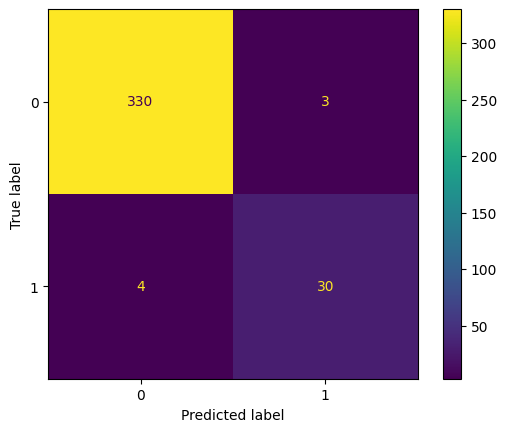

In [8]:
# Take k=5

knn_reg = KNeighborsClassifier(n_neighbors=5, weights='distance', metric="manhattan")  
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_test)

# Show coefs and metrics 
print(knn_reg.score(X_test,y_test))
print(classification_report(y_test,y_pred))

# Confusion Matrix with KNN
knn_cm=confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=knn_cm)
disp.plot()
plt.show()

In [9]:
#Recall score
print('Recall:',recall_score(y_test,y_pred))

Recall: 0.8823529411764706


# KNN Classifier recall 0.88

In [10]:
#Decision Tree
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)
tree= DecisionTreeClassifier(random_state=42, max_depth=2, criterion="entropy")
tree.fit(X_train, y_train)
y_predi = tree.predict(X_test)
print(tree.score(X_test,y_test))



0.9801980198019802


In [11]:
#Recall score
print('Recall:',recall_score(y_test,y_predi))

Recall: 0.9629629629629629


In [12]:
#Feature columns for plotting the tree
feature_cols = ['Generation', 'Legendary', 'Attack', 'Defense', 'Weight_kg', 'Height_m', 'Capture_rate',
                'Hp', 'Sp_attack', 'Sp_defense', 'Speed','Base_egg_steps', 'Base_happiness','Number_of_Abilities','Experience_growth']

Text(0.5, 1.0, 'Decision Tree - Classification')

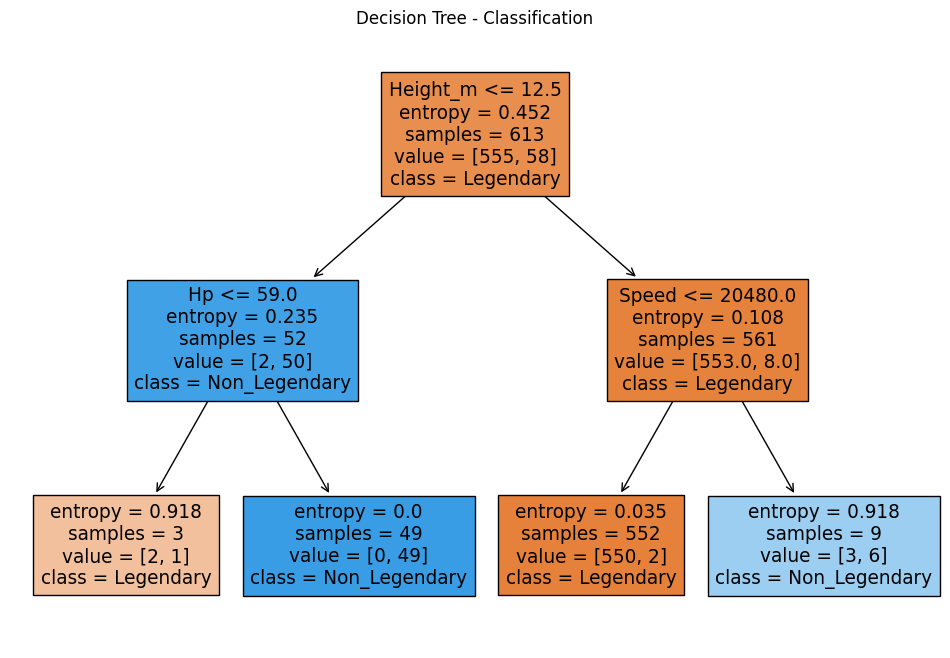

In [13]:
plt.figure(figsize=(12,8))
plot_tree(tree, filled=True, feature_names=feature_cols, class_names=['Legendary','Non_Legendary'])
plt.title("Decision Tree - Classification")

# Decission Tree recall 0.96

In [19]:
#Random Forest

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.4,random_state=42)

# Define the model
forest = RandomForestClassifier()

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20)
}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=forest,
                                    param_distributions=param_dist,
                                    n_iter=20,
                                    cv=5,
                                    scoring='recall',
                                    verbose=1,
                                    random_state=42)

# Perform Random Search
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best recall:", random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 113}
Best recall: 0.9454545454545453


In [20]:
best_forest = RandomForestClassifier(n_estimators=random_search.best_params_["n_estimators"],
                                    max_depth=random_search.best_params_["max_depth"],
                                    min_samples_split=random_search.best_params_["min_samples_split"]
                                    )

best_forest.fit(X_train,y_train)
print("Recall:", best_forest.score(X_test,y_test))

Recall: 0.989100817438692


Text(0.5, 1.0, 'Random Forest branch[0] - Classification')

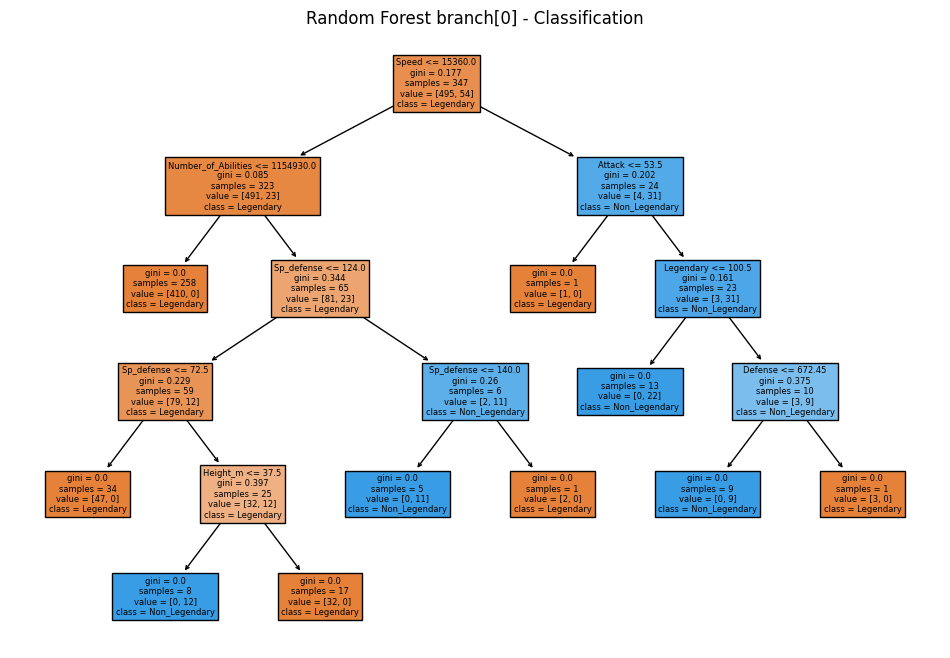

In [21]:
branch = best_forest.estimators_[0]
plt.figure(figsize=(12,8))
plot_tree(branch, filled=True, feature_names=feature_cols, class_names=['Legendary','Non_Legendary'])
plt.title("Random Forest branch[0] - Classification")

Text(0.5, 1.0, 'Random Forest branch[2] - Classification')

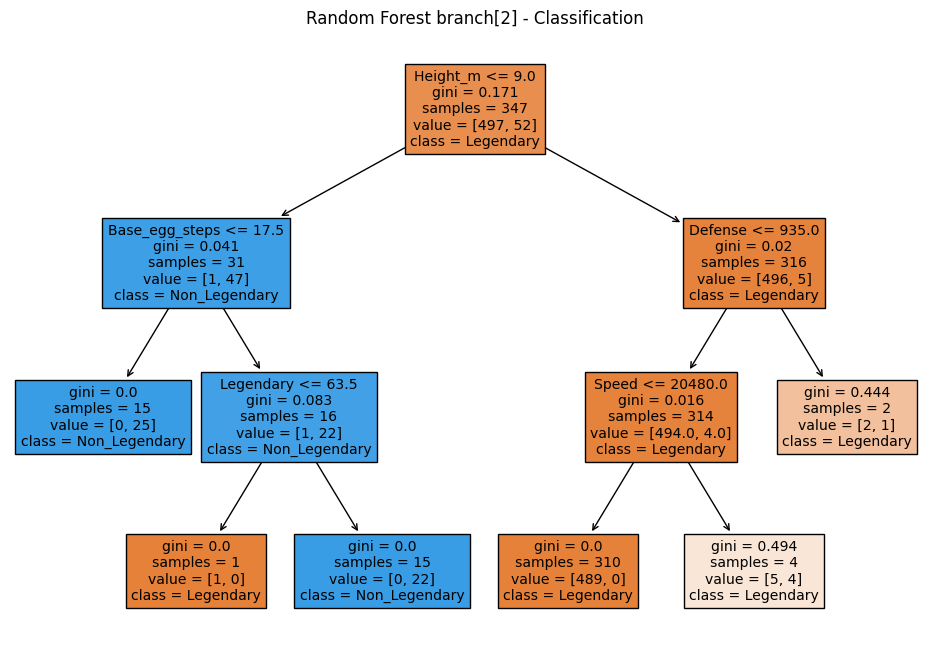

In [22]:
branch = best_forest.estimators_[2]
plt.figure(figsize=(12,8))
plot_tree(branch, filled=True, feature_names=feature_cols, class_names=['Legendary','Non_Legendary'])
plt.title("Random Forest branch[2] - Classification")

# BEST MODEL RANDOM FOREST CLASSIFIER WITH 0.98 RECALL

In [ ]:
# OBJETIVOS

# ULTIMATE POKEDEX CON STREAMLIT
# Primera pestaña introduccion

# MONTAR TU PROPIO EQUIPO Y PODER HACER PREDICTOR DE BATALLAS - OK
# CLASIFICADOR DE POKEMON SEGUN LEGENDARY? - OK
# ANALISIS DESCRIPTIVO DE LOS DATOS - OK
# SACAR TODAS LAS IMAGENES DE LOS POKEMONS - OK
# CUAL ES ESTE POKEMON - CASI OK, FALTA UN AJUSTE
